In [ ]:
!pip install pip install tensorflow==2.16.1
!pip install scikit-learn==0.24.2
!pip install imbalanced-learn==0.8.0

  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# prompt: kết nối drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/DoAnCuoiKy/diabetes.csv")

In [ ]:
data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [ ]:
print(f"Number of rows in dataframe are : {data.shape[0]} \nNumber of columns in dataframe are : {data.shape[1]} \n")

Number of rows in dataframe are : 768 
Number of columns in dataframe are : 9 



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


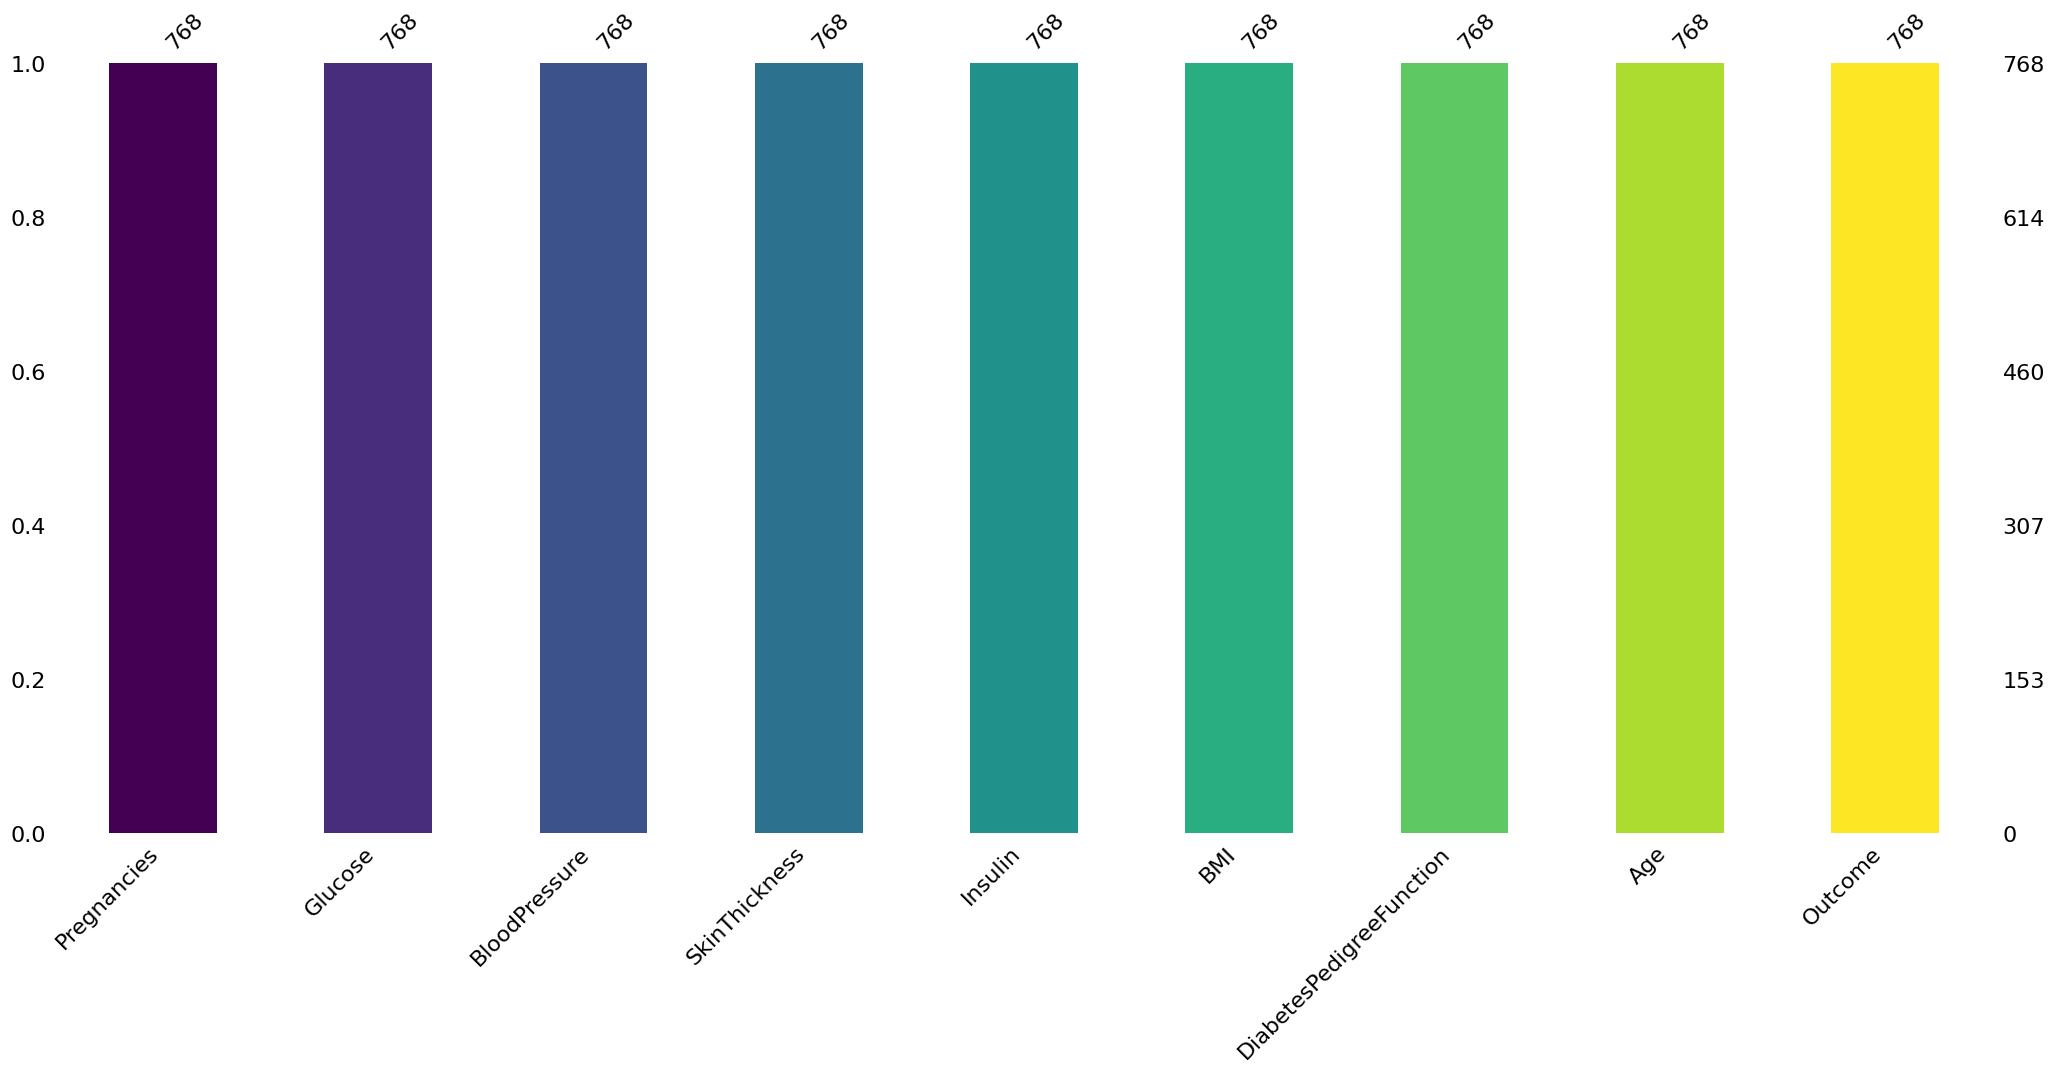

In [ ]:
import missingno as msno

num_columns = len(data.columns)
colors = plt.cm.viridis(np.linspace(0, 1, num_columns))
msno.bar(data, color=colors)
plt.show()


In [ ]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
data[data.duplicated()]


Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
print("Number of samples for Outcome 0 are : ",len(data[data['Outcome']==0]))
print("Number of samples for Outcome 1 are : ",len(data[data['Outcome']==1]))

Number of samples for Outcome 0 are :  500
Number of samples for Outcome 1 are :  268


In [ ]:
# Add all column names to a list except for the target variable
columns=data.columns
columns=list(columns)
columns.pop()
print("Column names except for the target column are :",columns)

#Graphs to be plotted with these colors
colours=['b','c','g','k','m','r','y','b']
print()
print('Colors for the graphs are :',colours)

Column names except for the target column are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Colors for the graphs are : ['b', 'c', 'g', 'k', 'm', 'r', 'y', 'b']


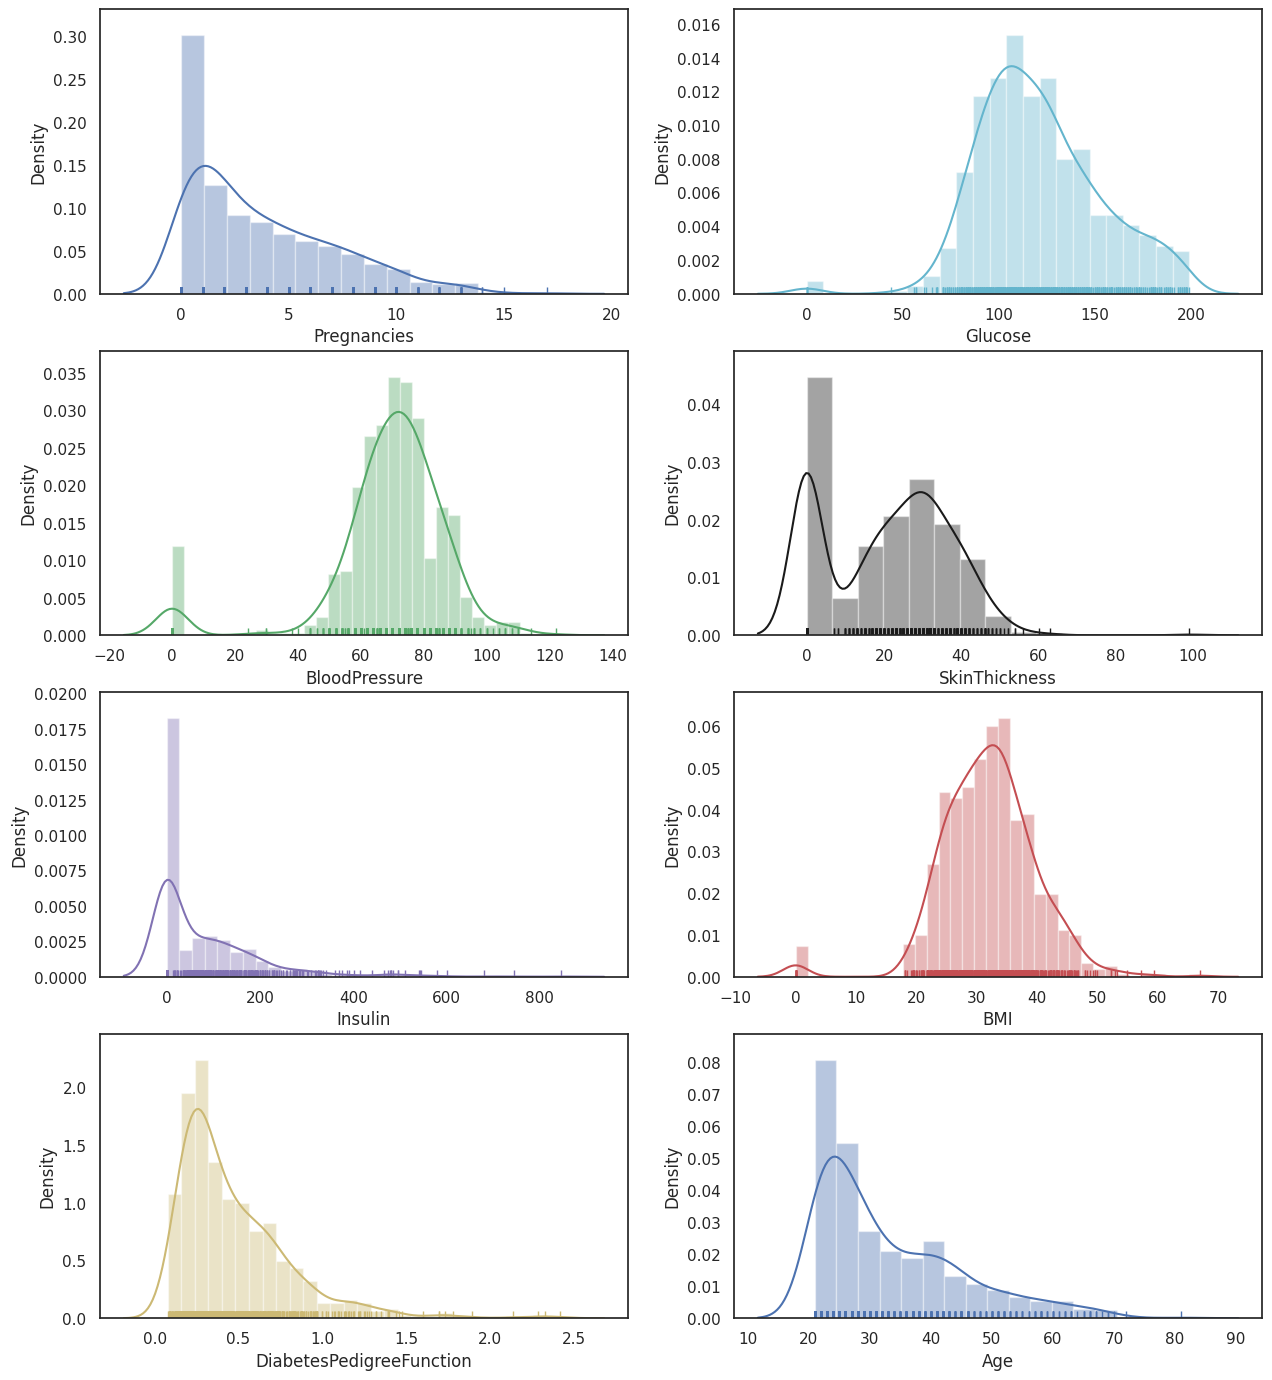

In [ ]:
sns.set(rc={'figure.figsize':(15,17)})
sns.set_style(style='white')
for i in range(len(columns)):

    plt.subplot(4,2,i+1)
    sns.distplot(data[columns[i]], hist=True, rug=True, color=colours[i])

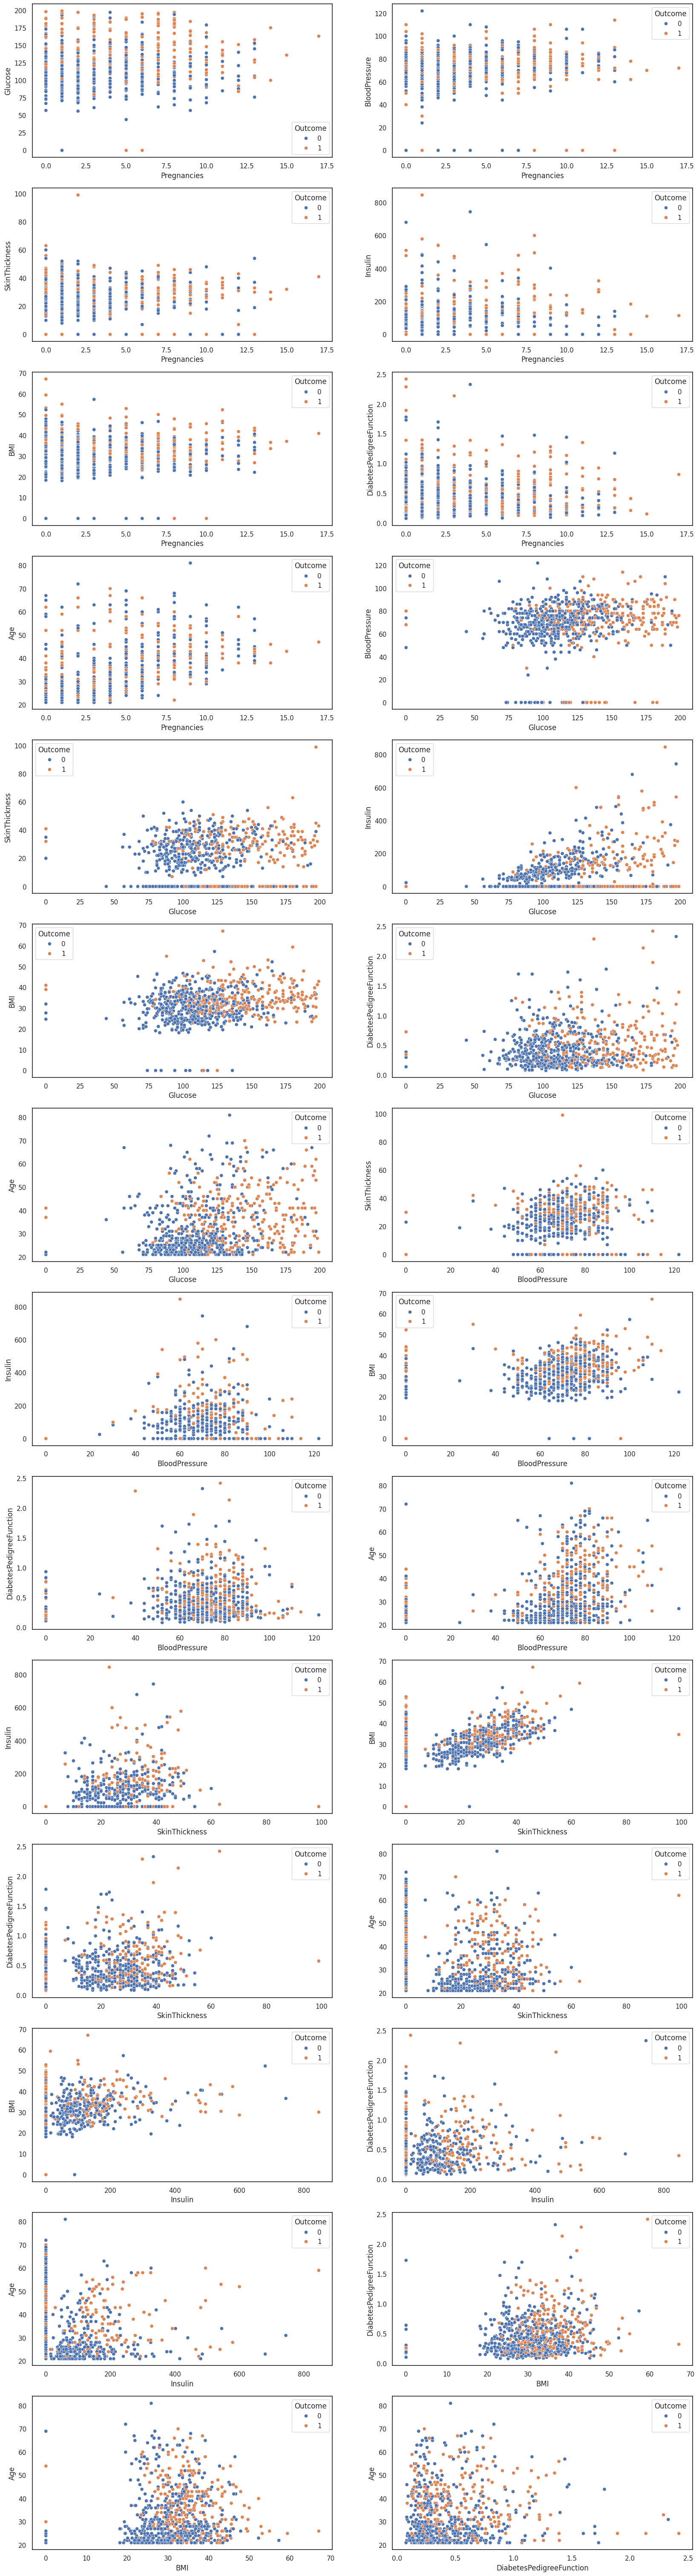

In [ ]:
sns.set(rc={'figure.figsize':(20,100)})
j=1

sns.set_style(style='white')
for i in range(len(columns)):
    for k in range(i,len(columns)):
        try:
            if i==k:
                continue
            plt.subplot(18,2,j)
            sns.scatterplot(x=data[columns[i]],y=data[columns[k]],hue="Outcome",data=data)
            j=j+1
        except:
            break

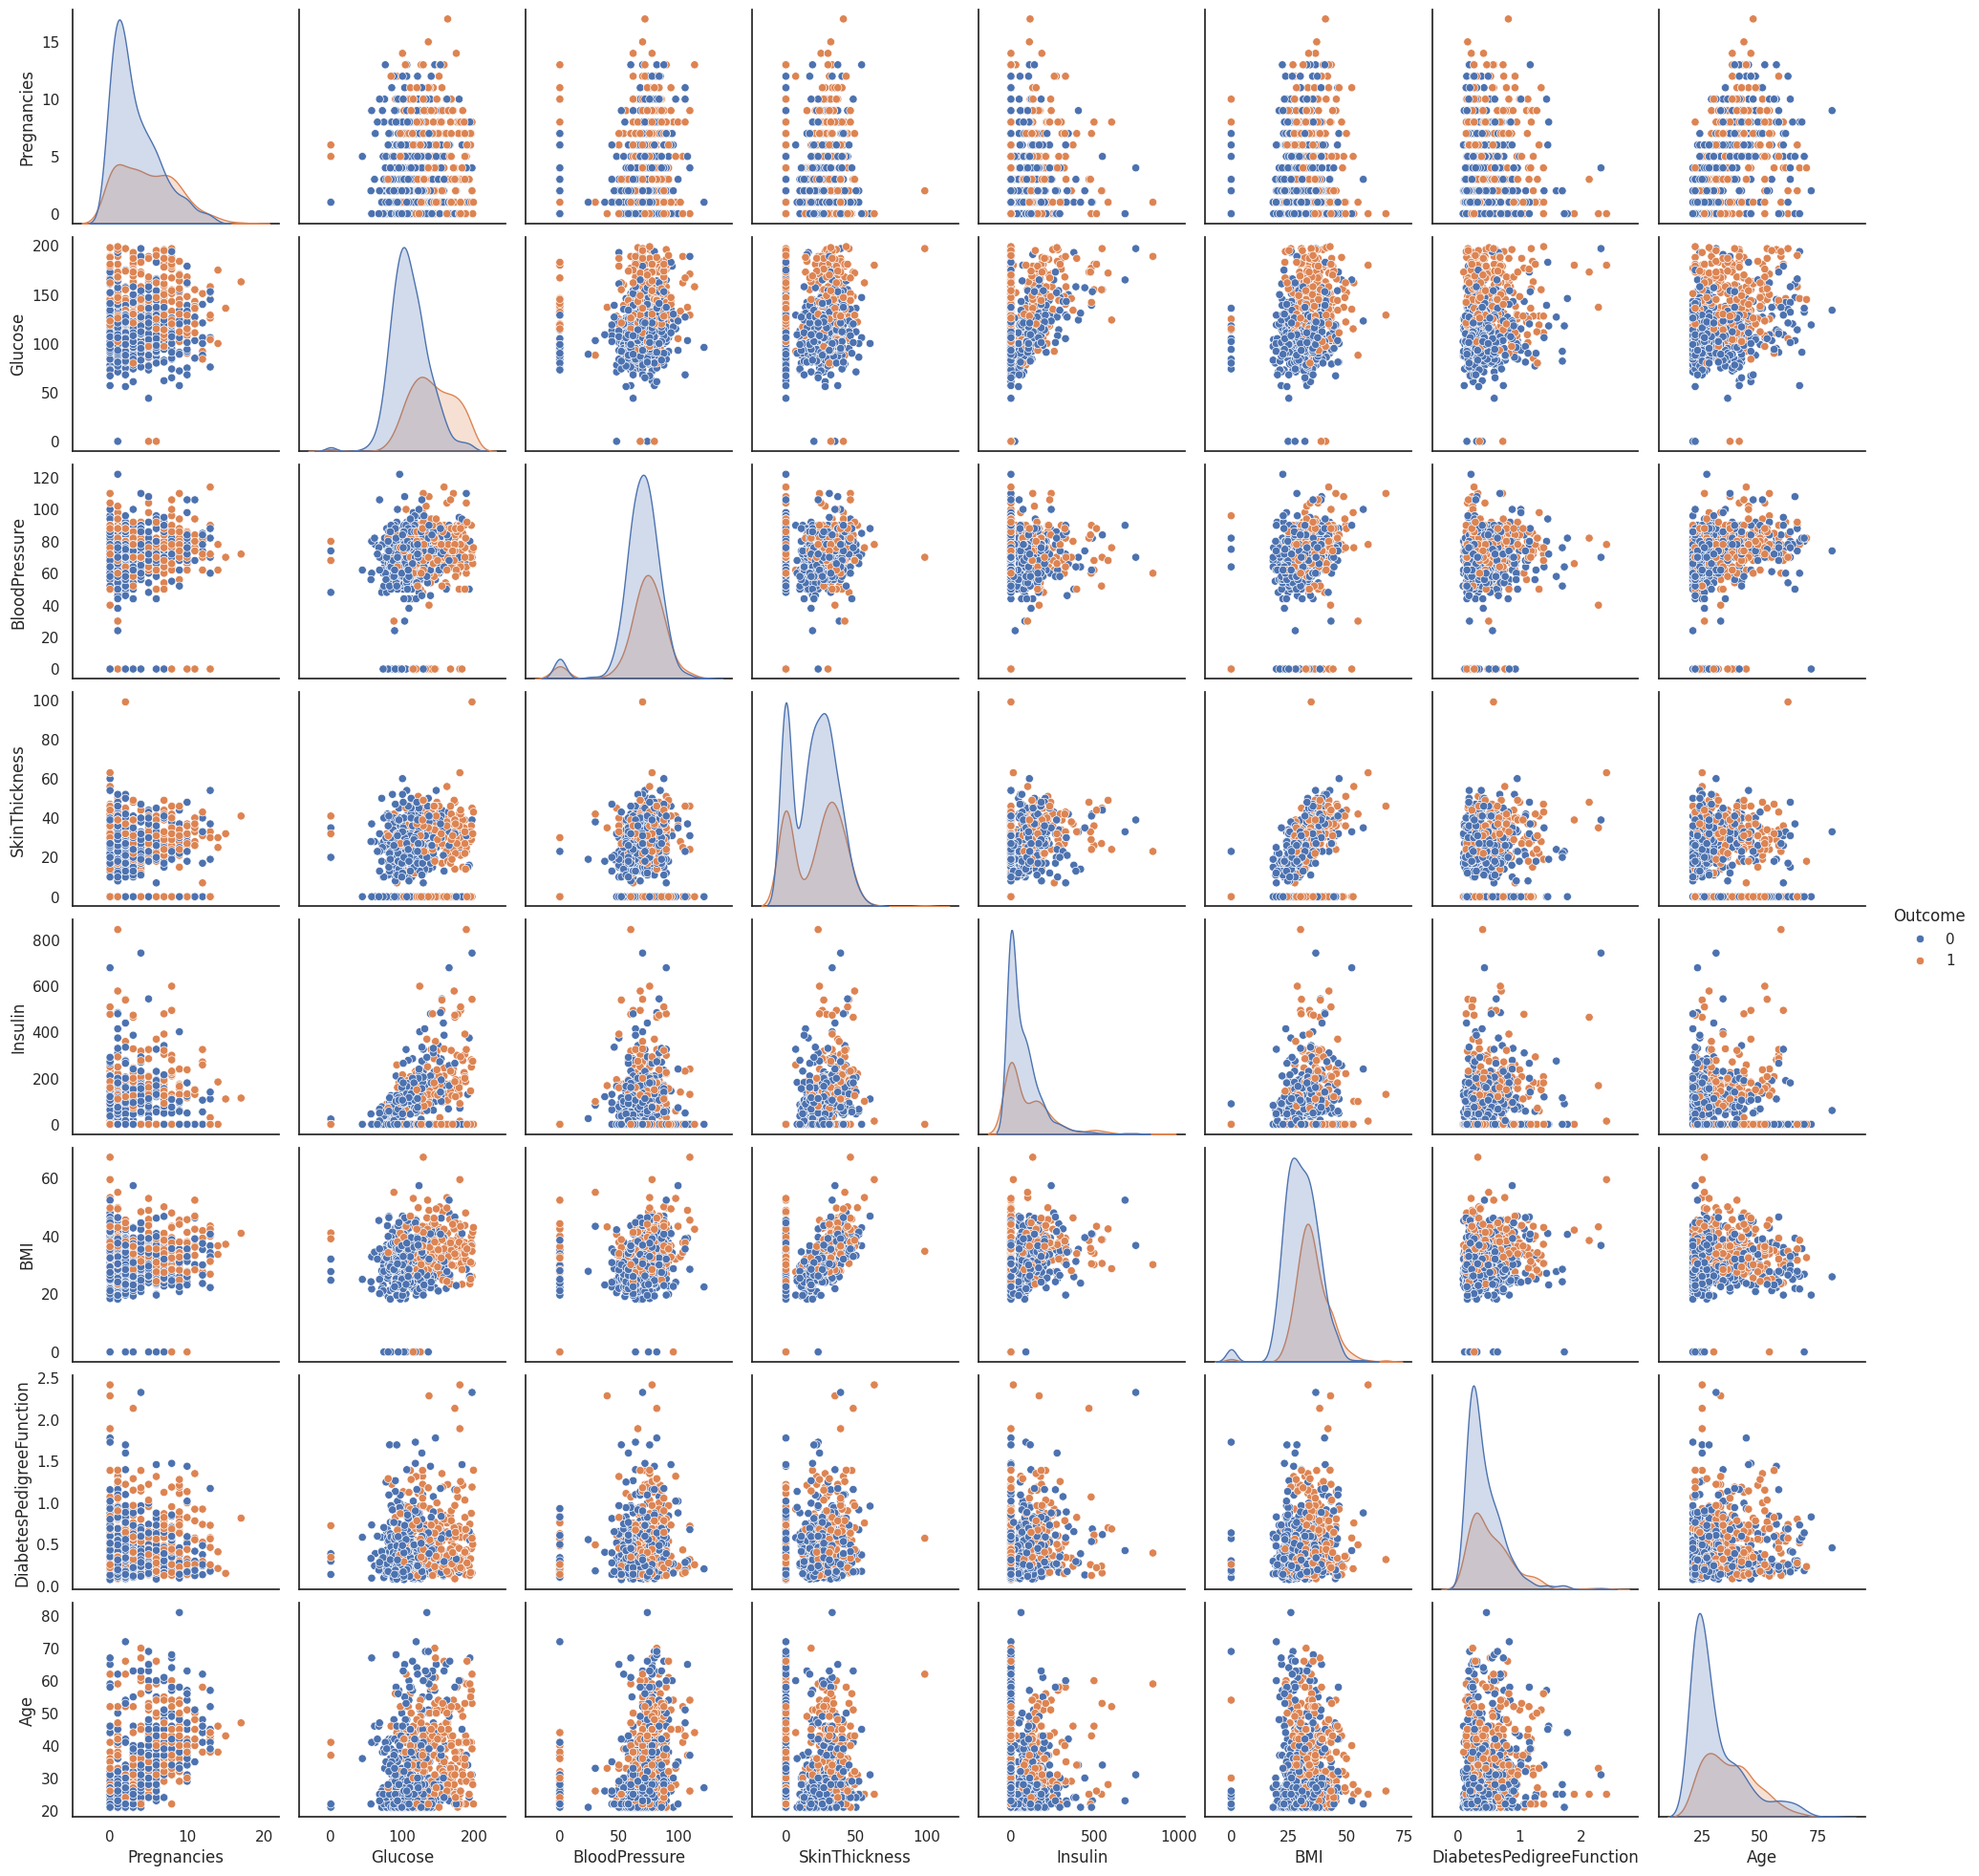

In [ ]:
sns.set(rc={'figure.figsize':(15,100)})
sns.set_style(style='white')

sns.pairplot(data, hue='Outcome')


<Axes: >

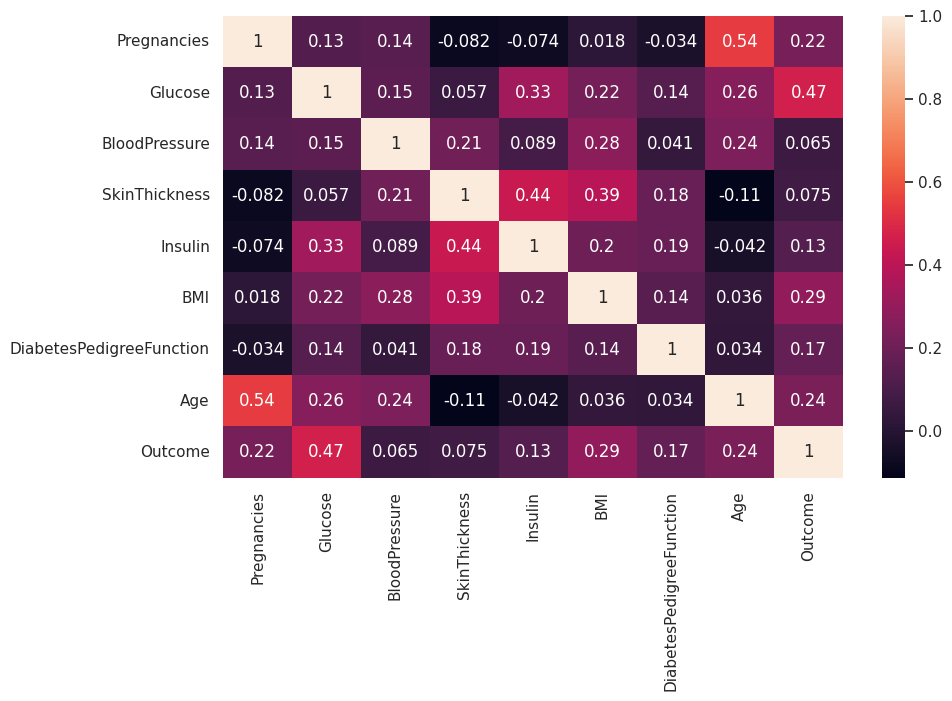

In [ ]:
plt.figure(figsize=(10,6))
sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(data.corr(), annot=True)

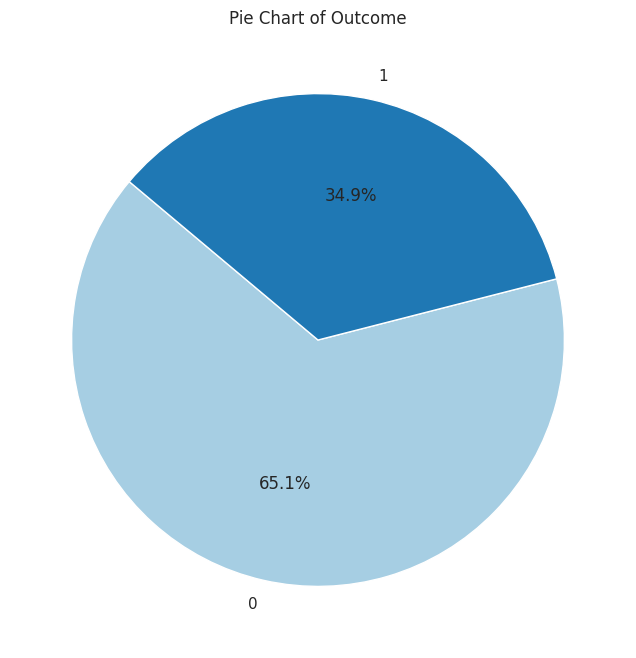

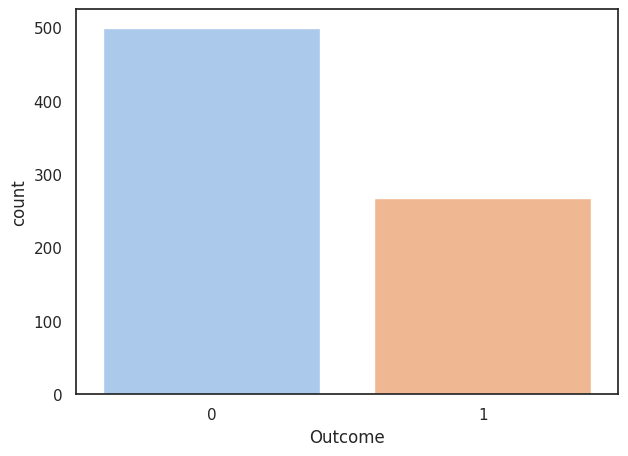

In [ ]:
def PlotPie(df, nameOfFeature):
    labels = df[nameOfFeature].value_counts().index.tolist()
    values = df[nameOfFeature].value_counts().values.tolist()

    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Pie Chart of {nameOfFeature}')
    plt.show()
PlotPie(data, 'Outcome')


plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='Outcome', palette='pastel')
plt.show()

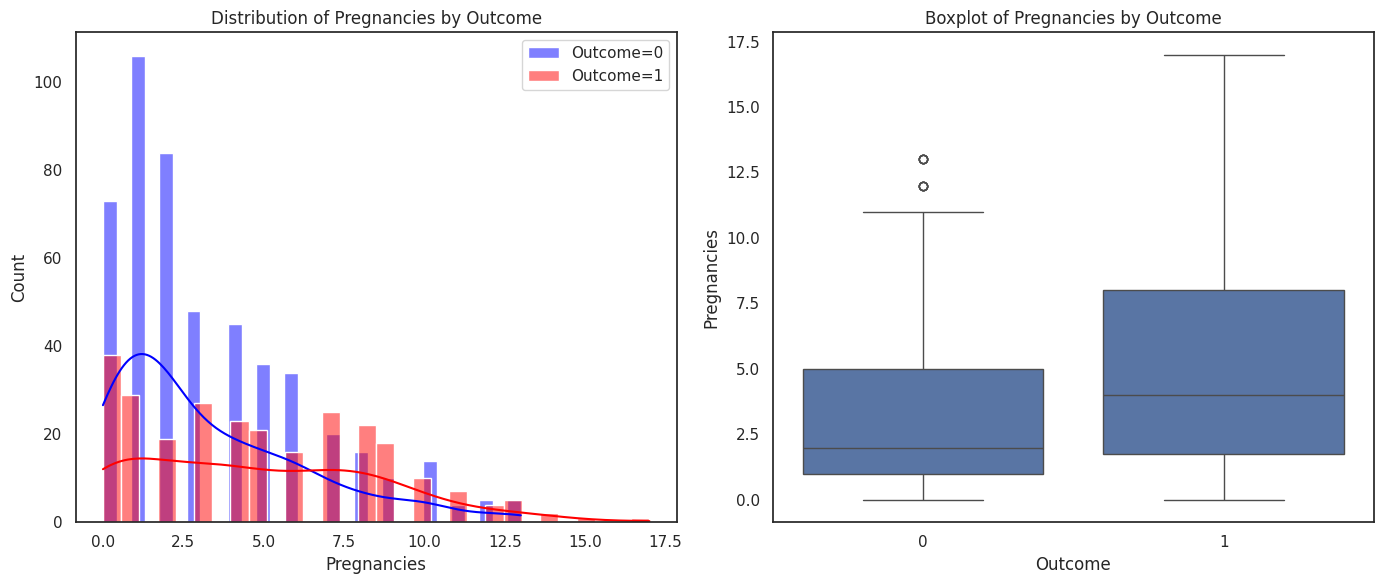

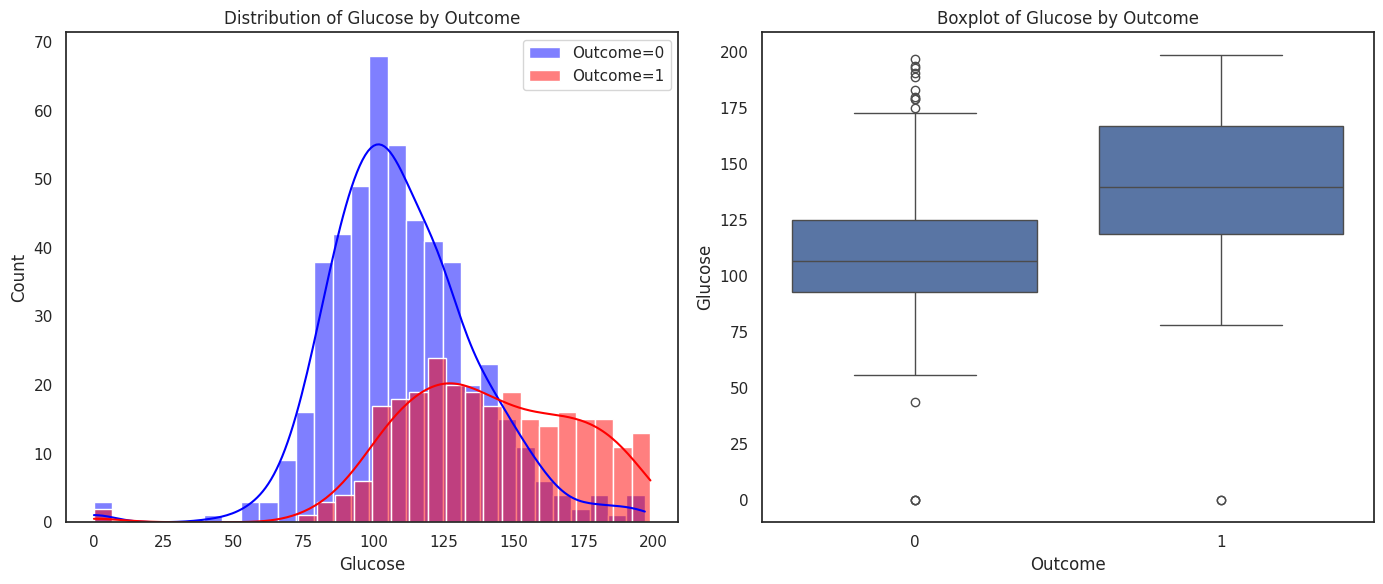

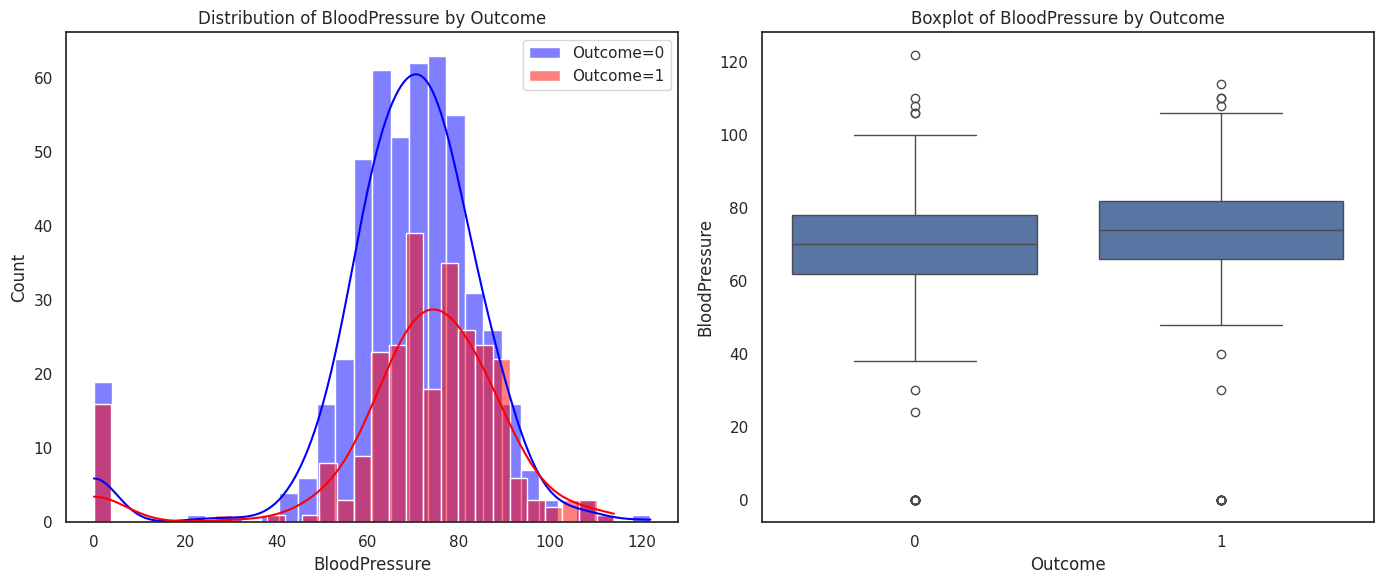

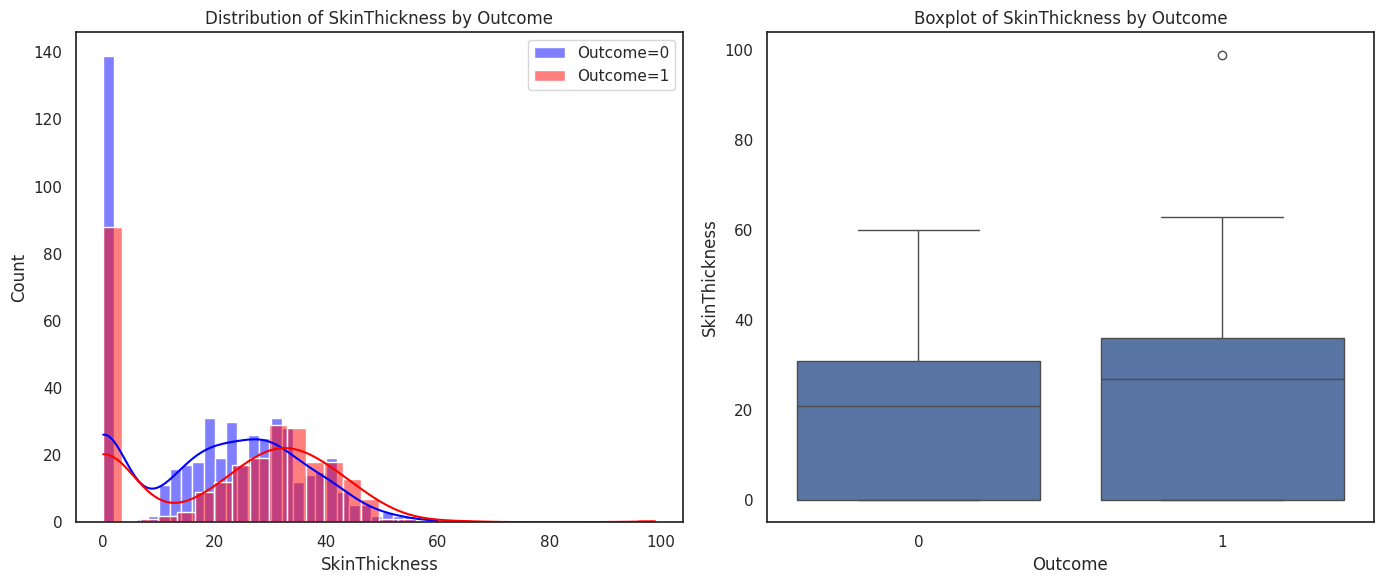

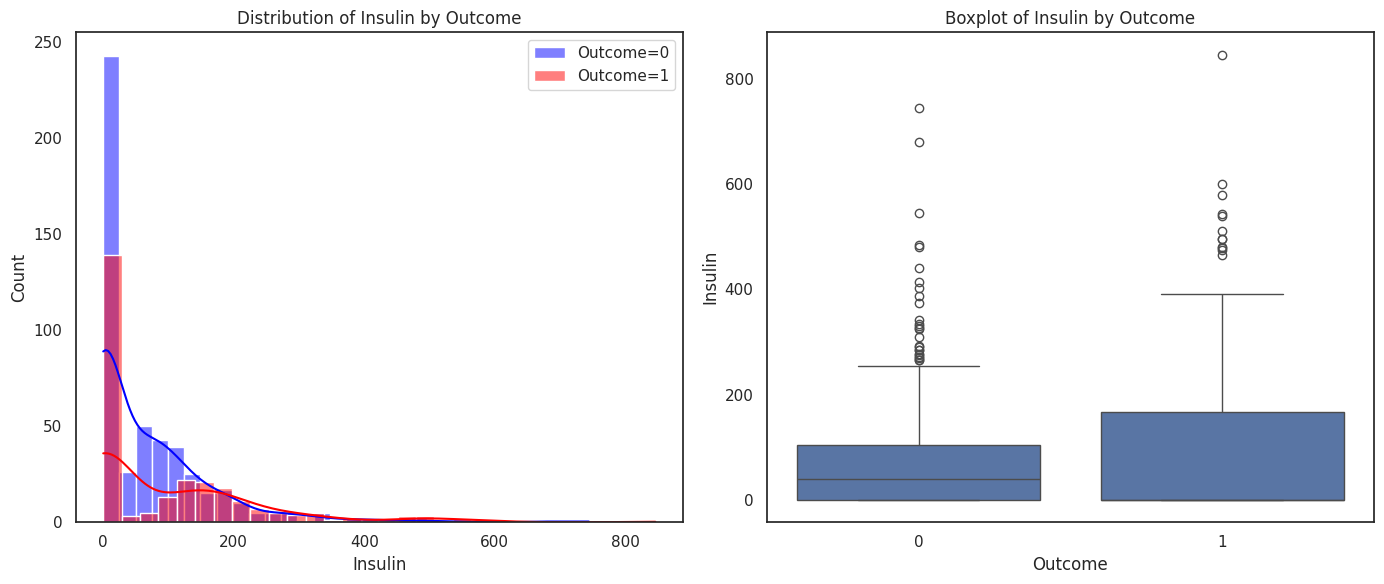

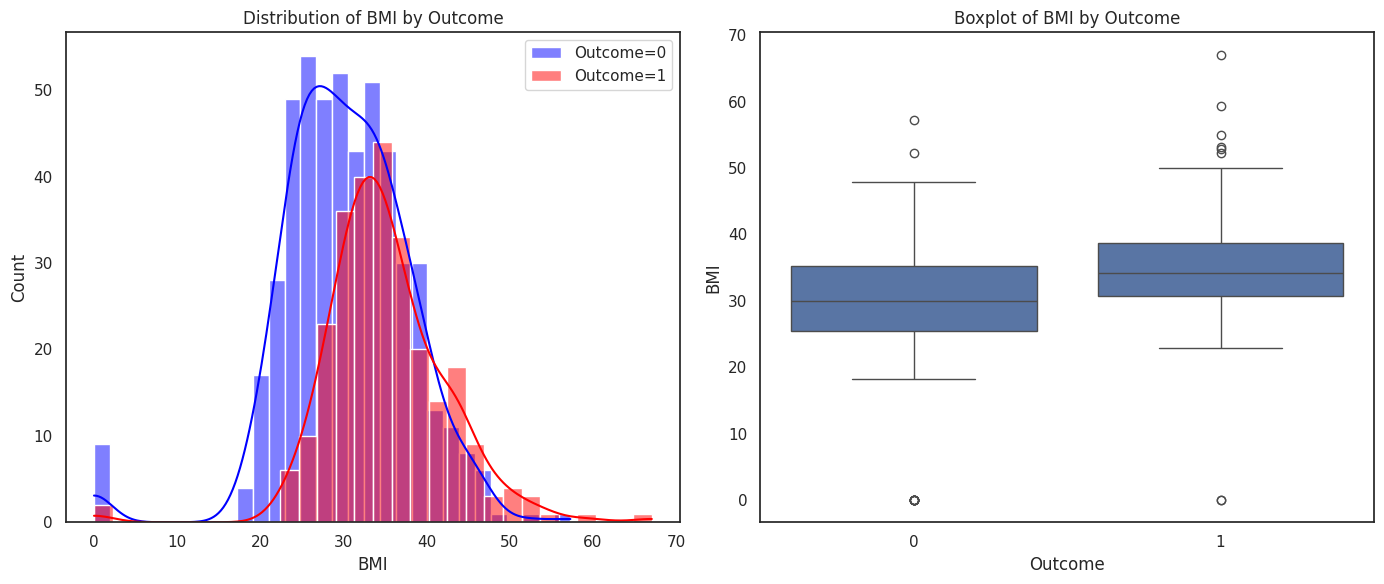

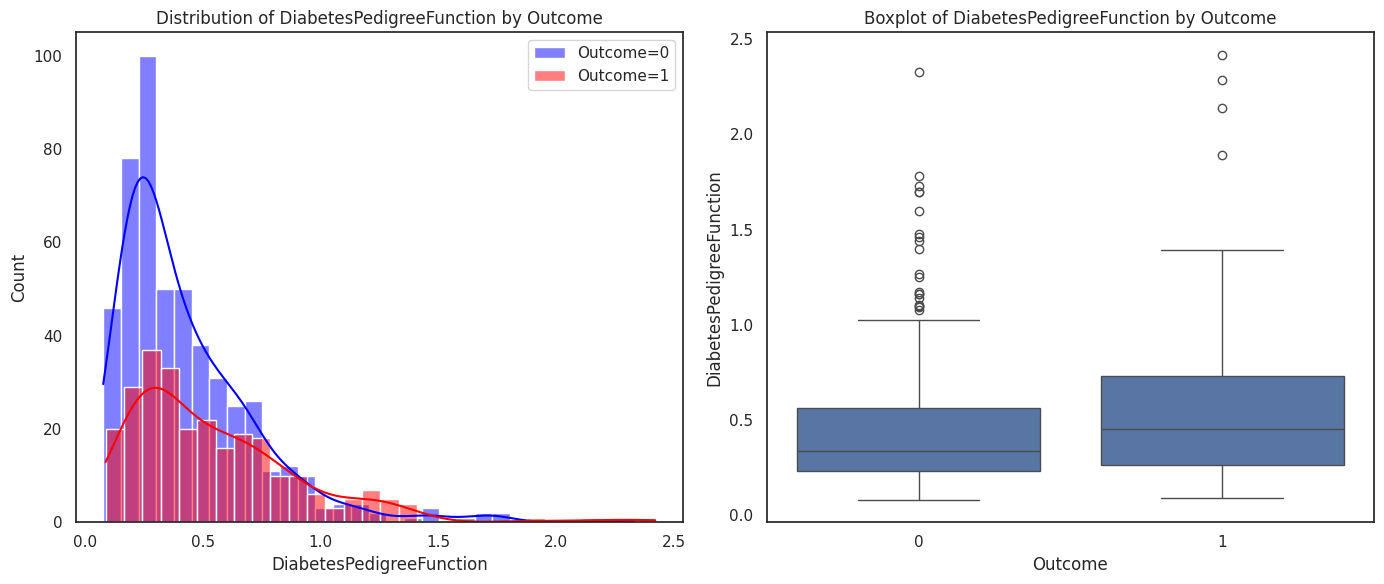

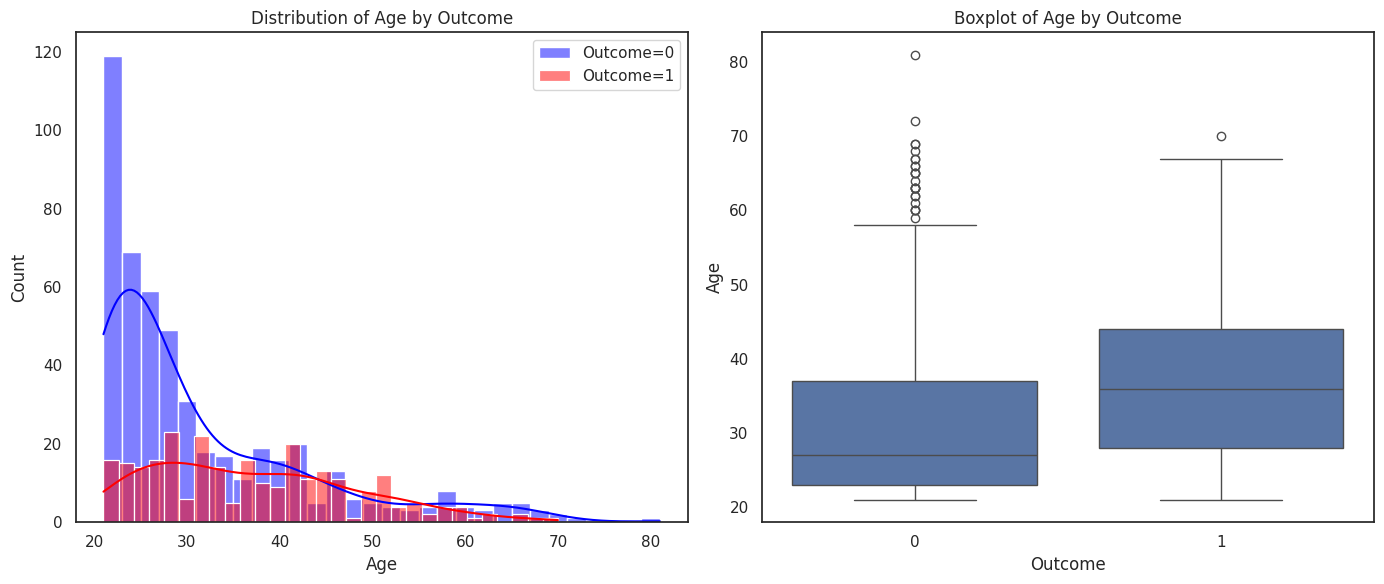

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot histogram and boxplot in the same layout
def plot_feature_distribution(df, feature, target):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot histogram
    sns.histplot(df[df[target] == 0][feature], bins=30, color='blue', label=f'{target}=0', kde=True, ax=axes[0])
    sns.histplot(df[df[target] == 1][feature], bins=30, color='red', label=f'{target}=1', kde=True, ax=axes[0])
    axes[0].legend()
    axes[0].set_title(f'Distribution of {feature} by {target}')

    # Plot boxplot
    sns.boxplot(x=target, y=feature, data=df, ax=axes[1])
    axes[1].set_title(f'Boxplot of {feature} by {target}')

    plt.tight_layout()
    plt.show()

# Plotting for each feature
for feature in data.columns[:-1]:
    plot_feature_distribution(data, feature, 'Outcome')


In [ ]:
# Function to remove outliers
def remove_outliers(df, feature, drop=False):
    value_of_feature = df[feature]
    Q1 = np.percentile(value_of_feature, 25)
    Q3 = np.percentile(value_of_feature, 75)
    step = 1.5 * (Q3 - Q1)
    outliers = value_of_feature[~((value_of_feature >= Q1 - step) & (value_of_feature <= Q3 + step))].index.tolist()
    feature_outliers = value_of_feature[~((value_of_feature >= Q1 - step) & (value_of_feature <= Q3 + step))].values
    print("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df.drop(df.index[outliers]).reset_index(drop=True)
        print("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else:
        print("Nothing happens, df.shape =", df.shape)
        return df

# Function to predict and plot confusion matrix
def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    return preds, accuracy

# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    print(f"Evaluating {name}...")
    model.fit(X_train, y_train)
    _, train_accuracy = predict_and_plot(model, X_train, y_train, f'{name} Train')
    _, test_accuracy = predict_and_plot(model, X_test, y_test, f'{name} Validation')
    return train_accuracy, test_accuracy


In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
# from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    return train_accuracy, test_accuracy, train_preds, test_preds

# Function to plot confusion matrices in a single layout
def plot_confusion_matrices(y_train, train_preds, y_test, test_preds, model_name):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot confusion matrix for training data
    train_cf = confusion_matrix(y_train, train_preds, normalize='true')
    sns.heatmap(train_cf, annot=True, ax=axes[0])
    axes[0].set_title(f'{model_name} Train Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    # Plot confusion matrix for test data
    test_cf = confusion_matrix(y_test, test_preds, normalize='true')
    sns.heatmap(test_cf, annot=True, ax=axes[1])
    axes[1].set_title(f'{model_name} Test Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

In [ ]:

# Initialize lists to store results
model_names = []
train_accuracies_before = []
test_accuracies_before = []
train_accuracies_after = []
test_accuracies_after = []

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200),
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5),
    "SVM Linear": SVC(kernel='linear'),
    "SVM RBF": SVC(kernel='rbf'),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=3, random_state=42)
}

In [ ]:
# Apply SMOTE to handle imbalanced data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# K-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



Before cleaning the data:


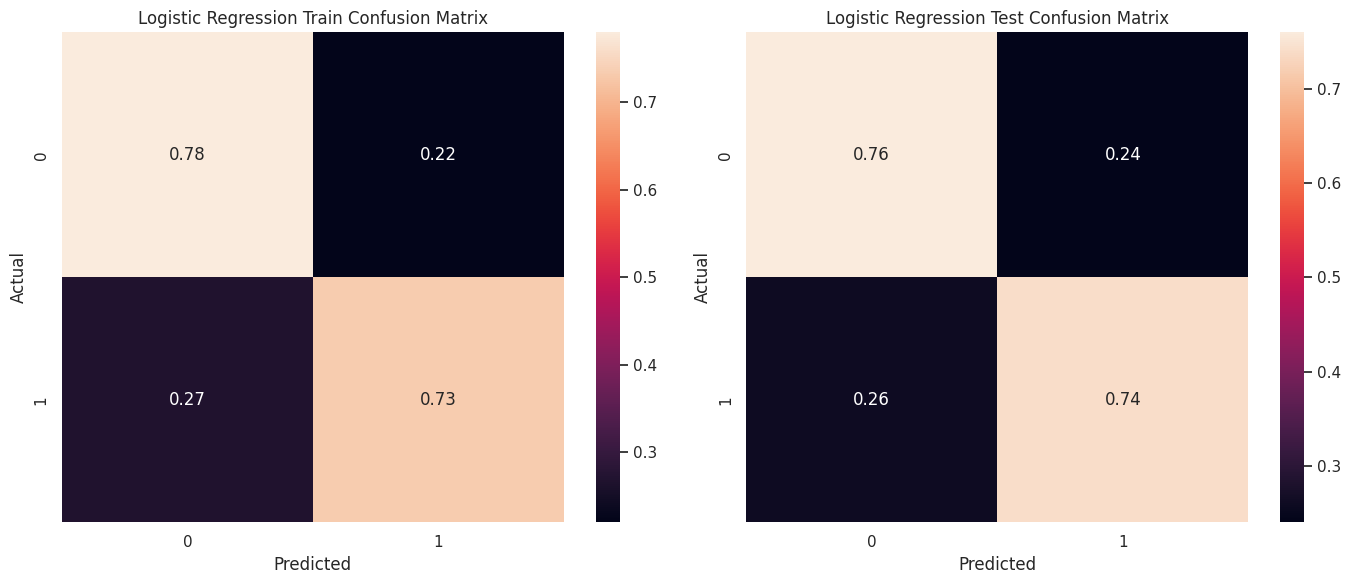

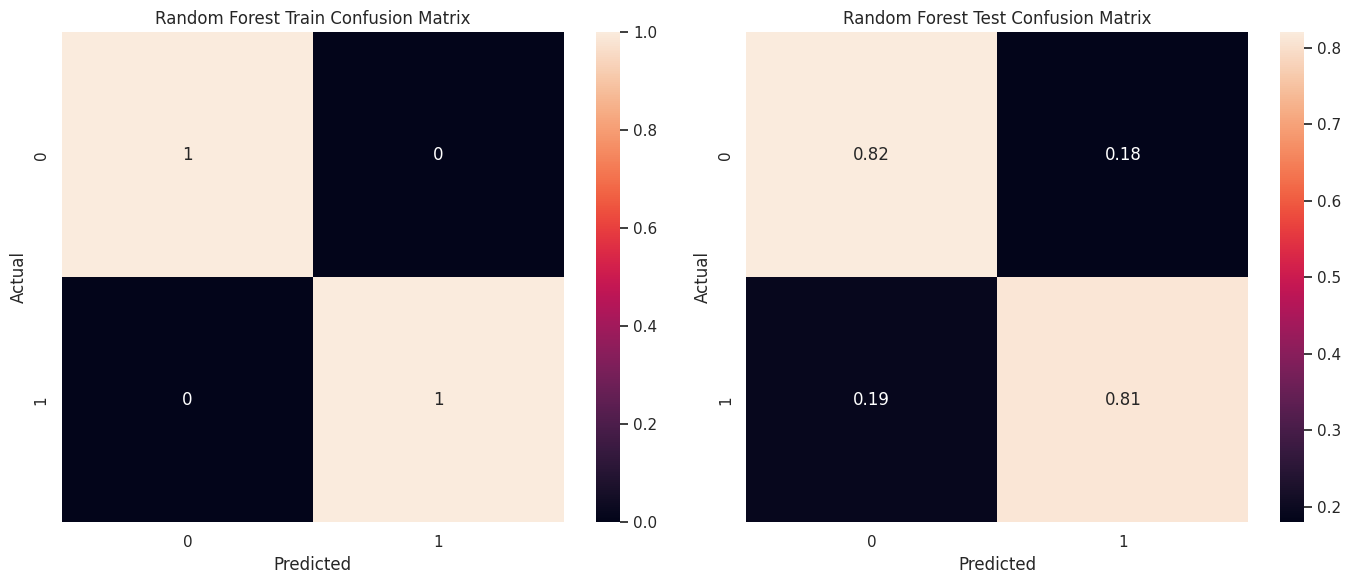

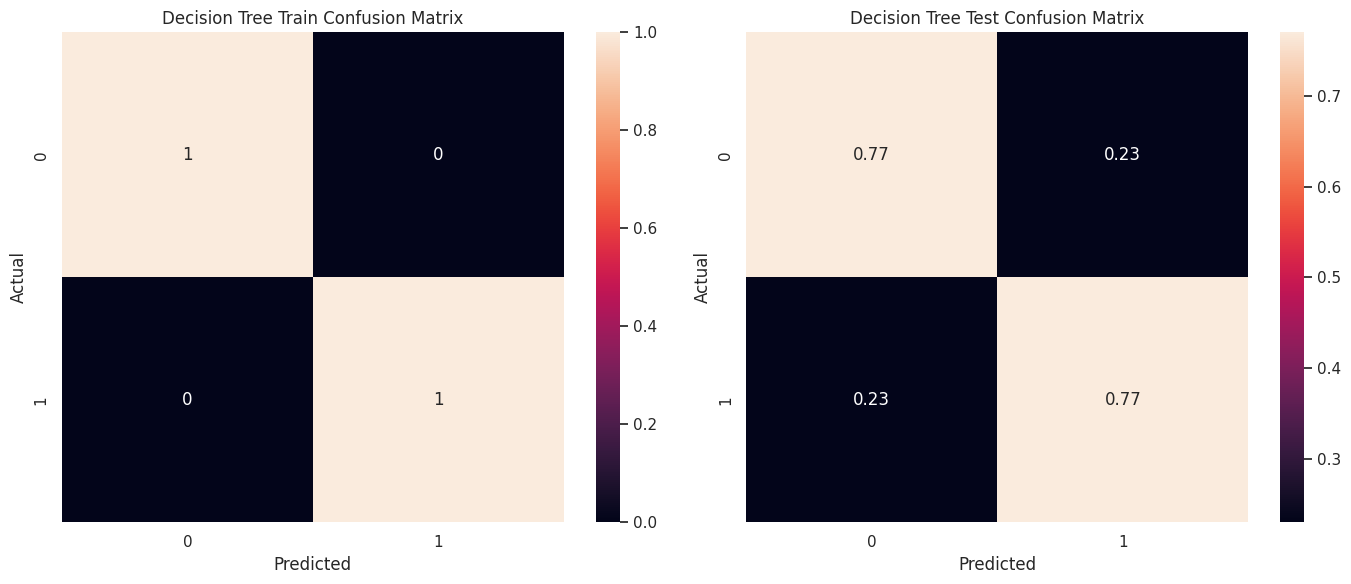

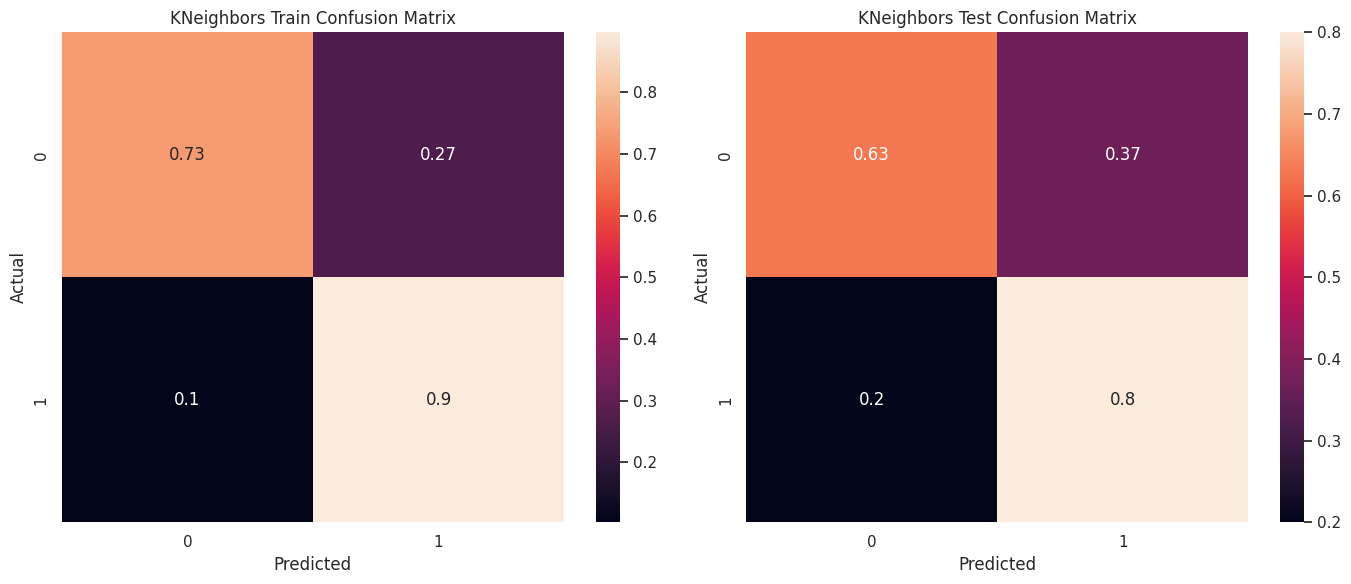

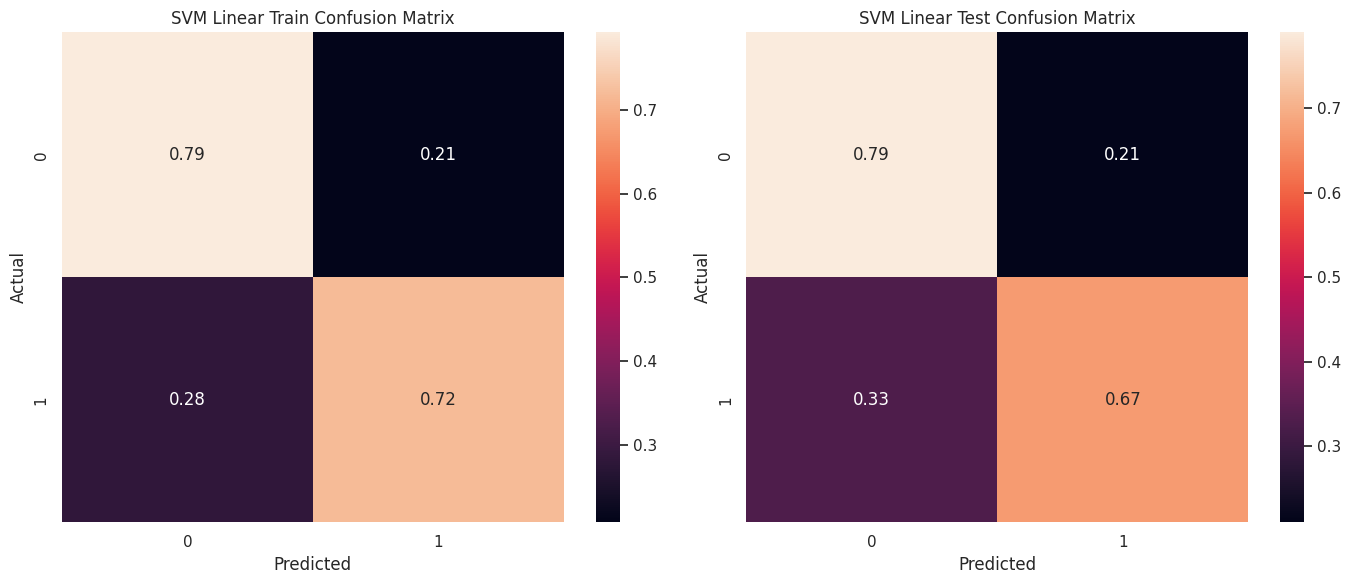

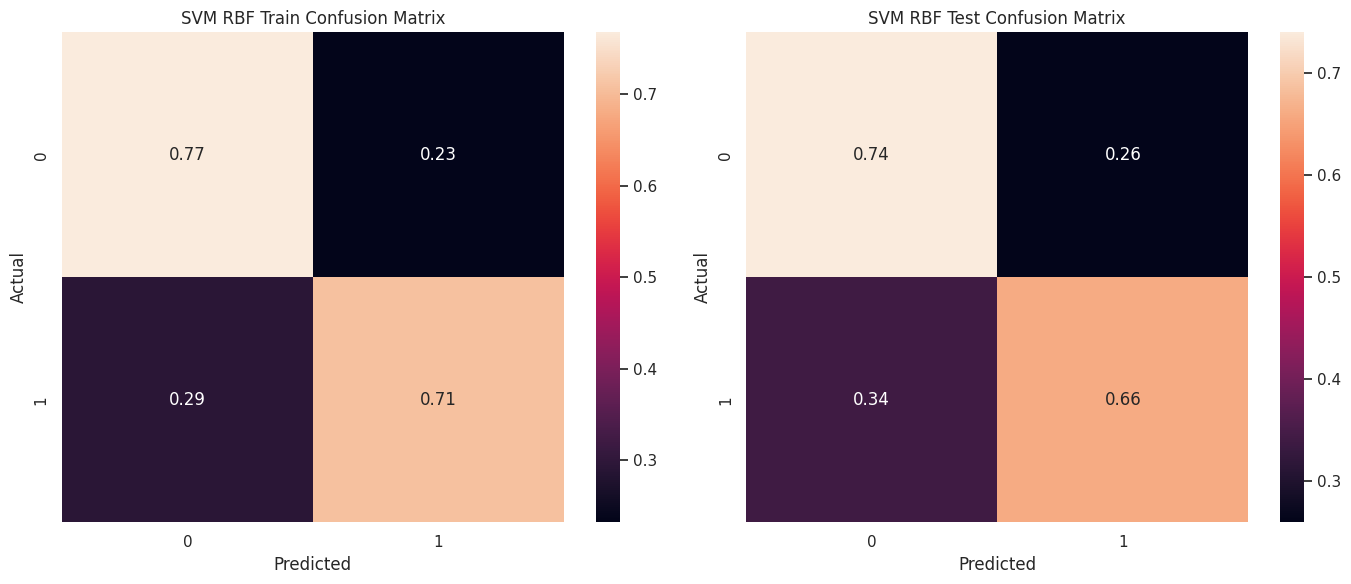

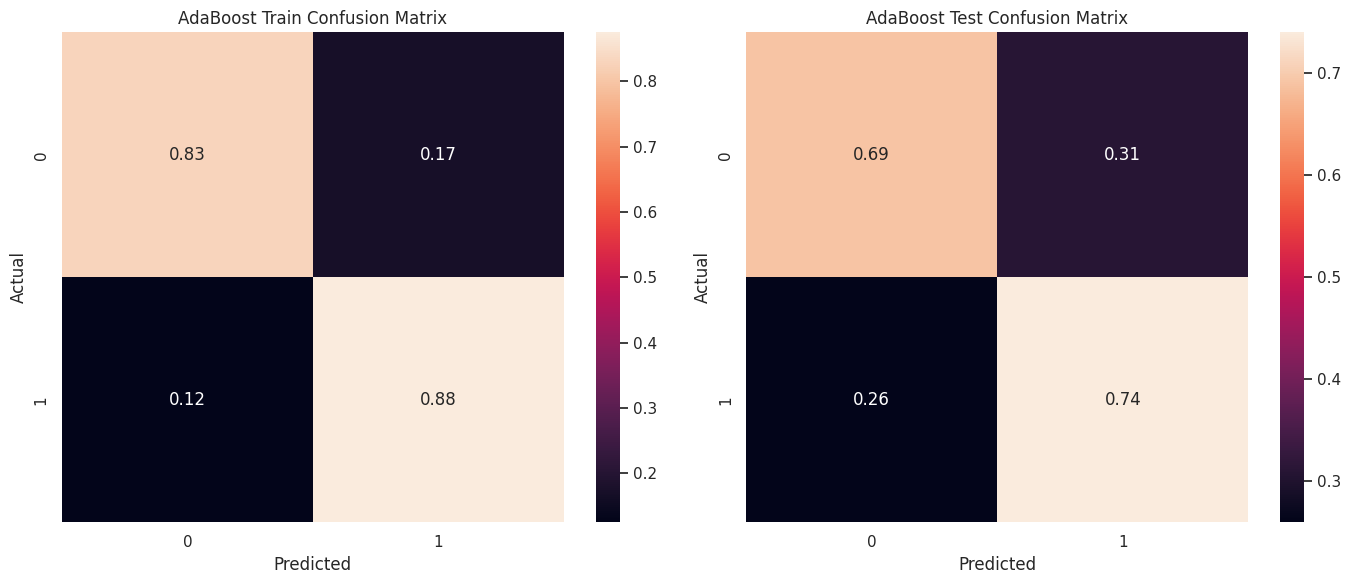

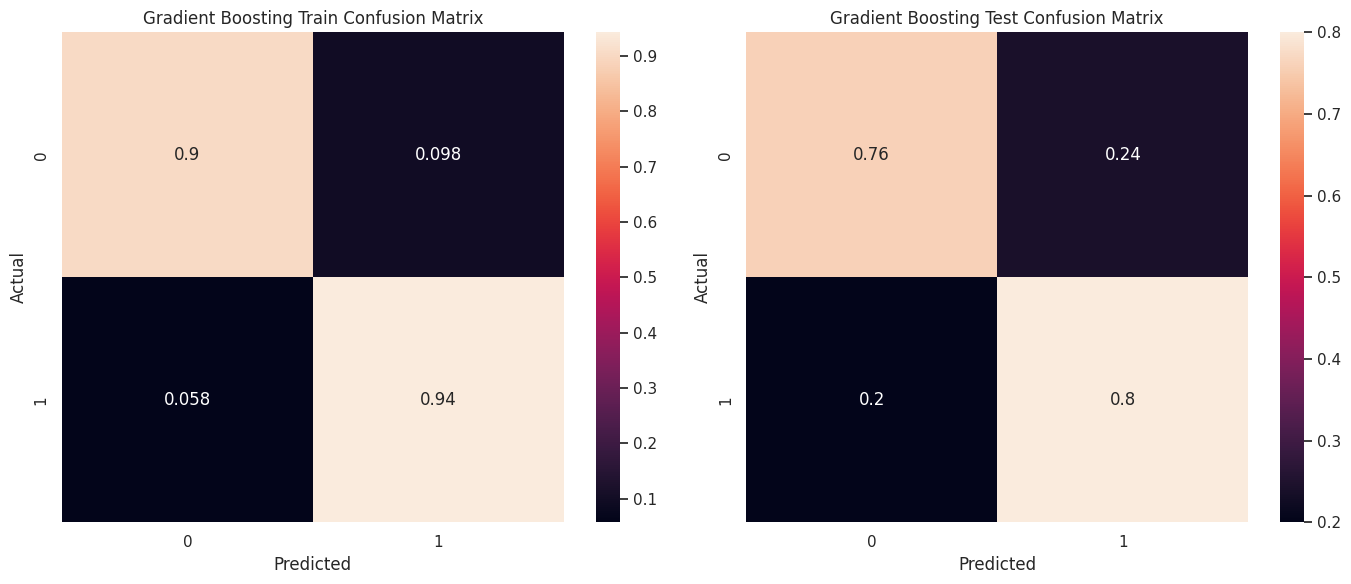

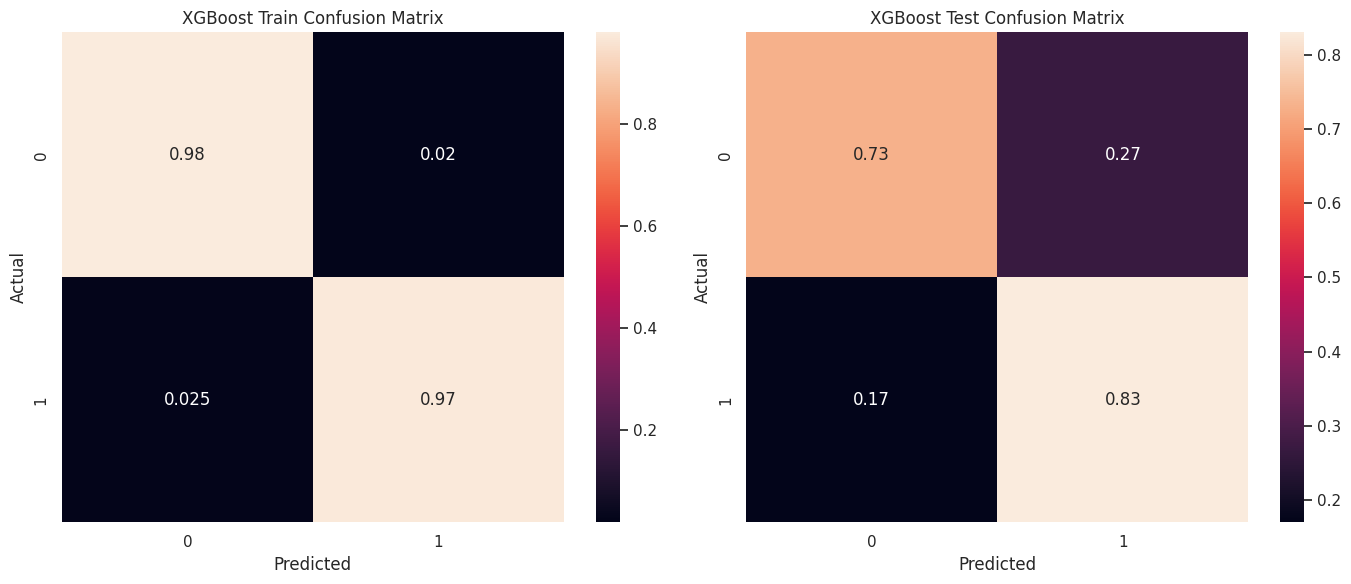

In [ ]:
print("Before cleaning the data:")
for name, model in models.items():
    model_names.append(name)
    cv_train_accuracies = []
    cv_test_accuracies = []
    train_preds_all = []
    test_preds_all = []

    for train_index, test_index in skf.split(X_resampled, y_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

        train_accuracy, test_accuracy, train_preds, test_preds = evaluate_model(model, X_train, y_train, X_test, y_test)
        cv_train_accuracies.append(train_accuracy)
        cv_test_accuracies.append(test_accuracy)
        train_preds_all.append(train_preds)
        test_preds_all.append(test_preds)

    train_accuracies_before.append(np.mean(cv_train_accuracies))
    test_accuracies_before.append(np.mean(cv_test_accuracies))

    # Plot confusion matrices for the last fold
    plot_confusion_matrices(y_train, train_preds, y_test, test_preds, name)


In [ ]:
# Remove outliers
df_clean = data.copy()
for feature in data.columns:
    if feature != 'Outcome':
        df_clean = remove_outliers(df_clean, feature, drop=True)
        print("\n")

print(f'df shape: {data.shape}, new df shape: {df_clean.shape}, we lost {data.shape[0] - df_clean.shape[0]} rows, {(data.shape[0] - df_clean.shape[0]) / data.shape[0] * 100:.2f}% of our data')
X_cleaned = df_clean.drop('Outcome', axis=1)
y_cleaned = df_clean['Outcome']

# Apply SMOTE to cleaned data
X_cleaned_resampled, y_cleaned_resampled = smote.fit_resample(X_cleaned, y_cleaned)

Number of outliers (inc duplicates): 4 and outliers: [15 17 14 14]
New dataset with removed outliers has 764 samples with 9 features each.


Number of outliers (inc duplicates): 5 and outliers: [0 0 0 0 0]
New dataset with removed outliers has 759 samples with 9 features each.


Number of outliers (inc duplicates): 45 and outliers: [  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]
New dataset with removed outliers has 714 samples with 9 features each.


Number of outliers (inc duplicates): 1 and outliers: [99]
New dataset with removed outliers has 713 samples with 9 features each.


Number of outliers (inc duplicates): 27 and outliers: [543 846 342 495 485 495 478 744 370 680 402 375 545 360 465 415 579 474
 480 600 440 540 480 335 387 392 510]
New dataset with removed outliers has 686 samples with 9 features each.


Number of outliers (inc duplicates): 

After cleaning the data:


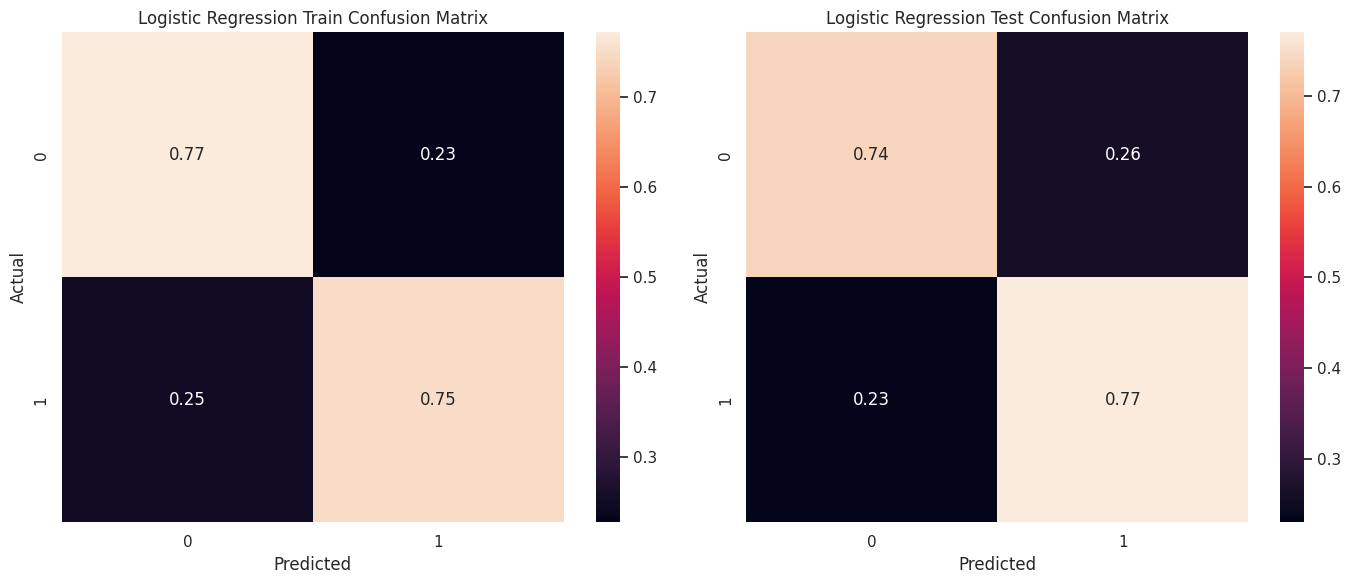

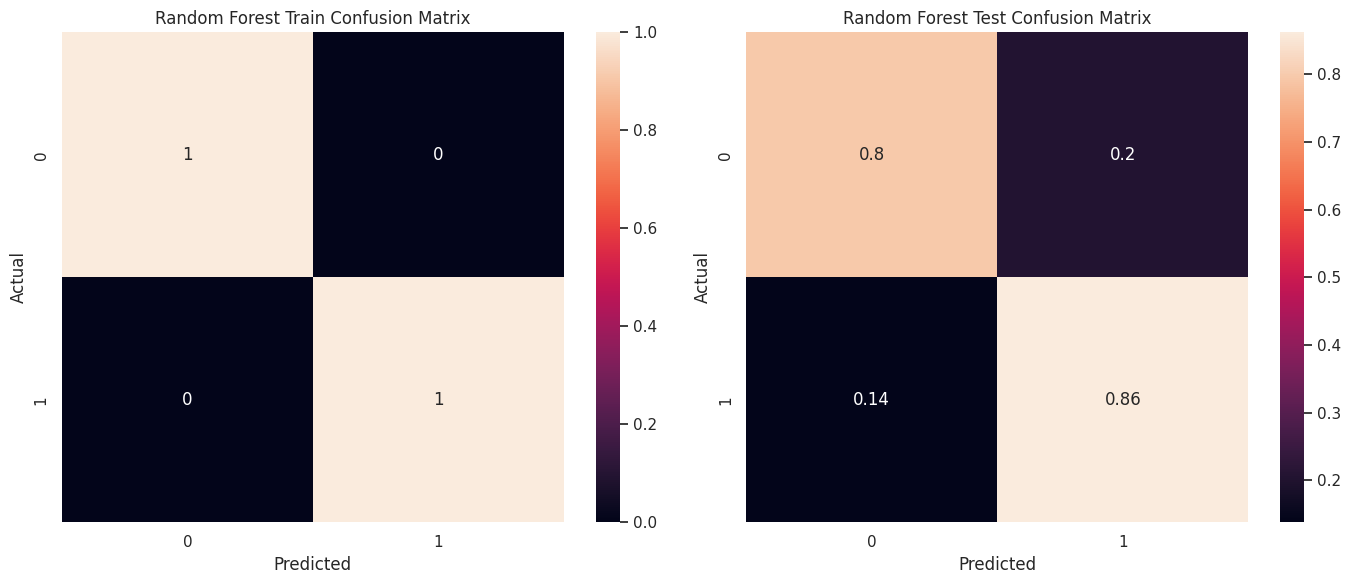

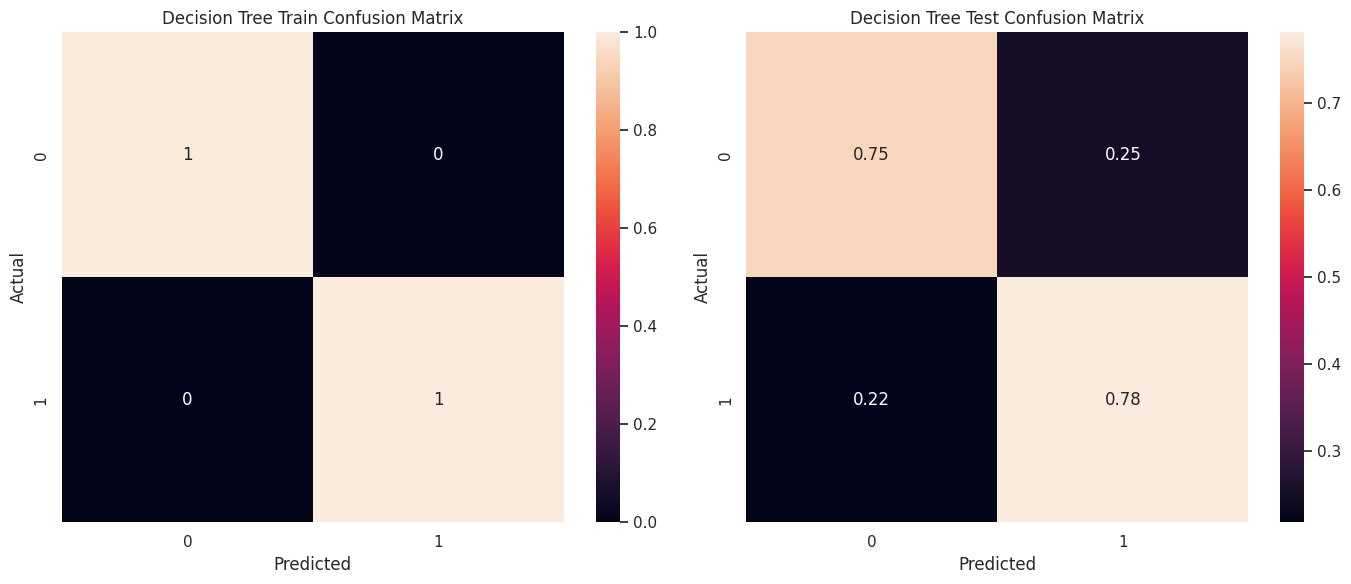

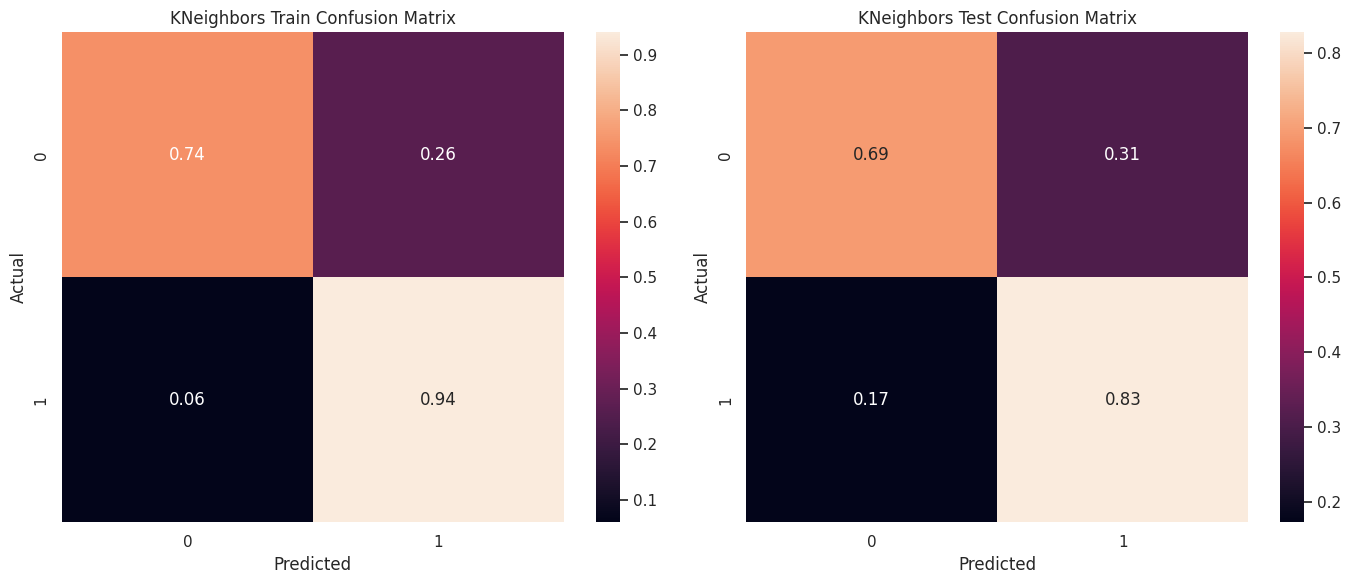

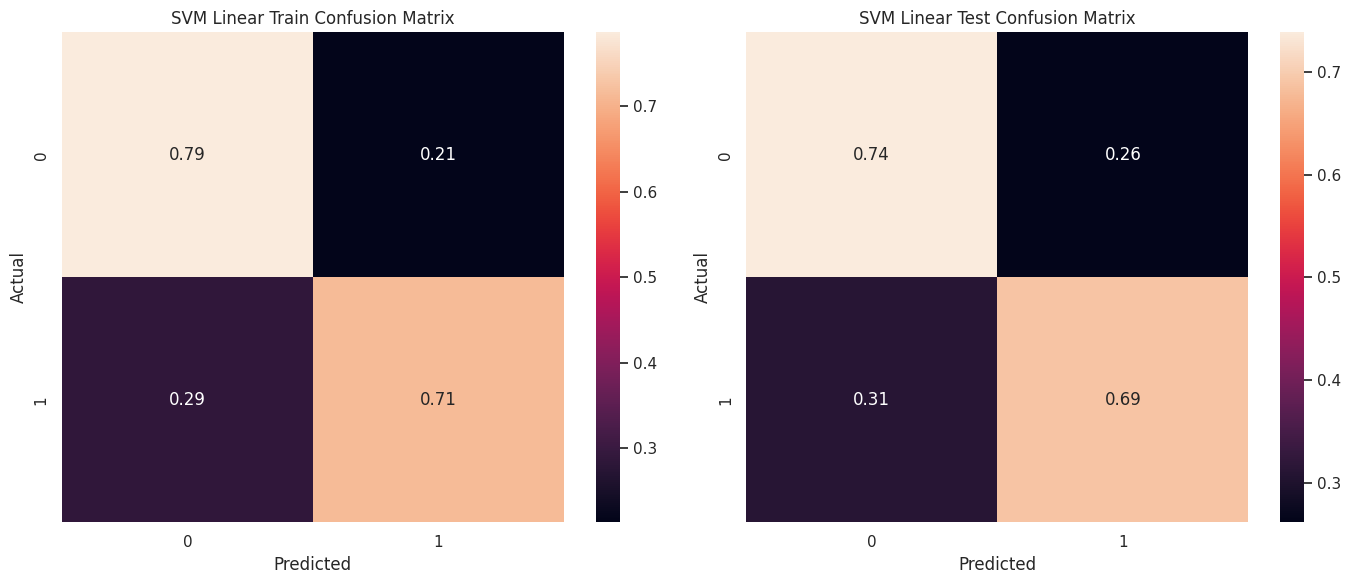

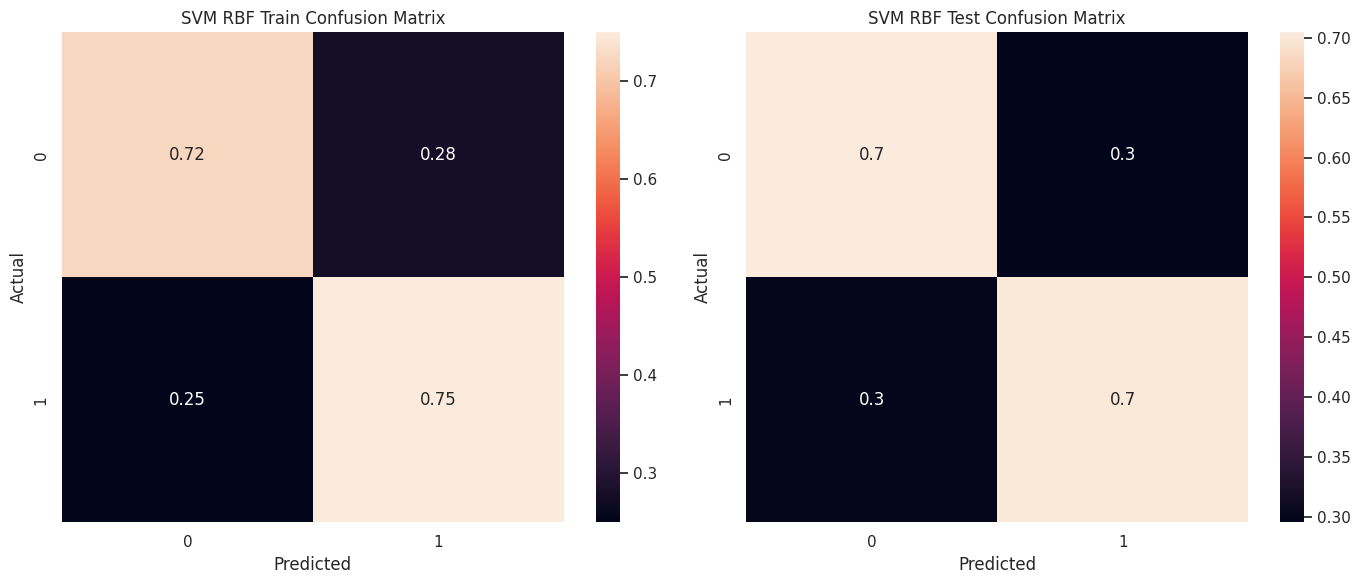

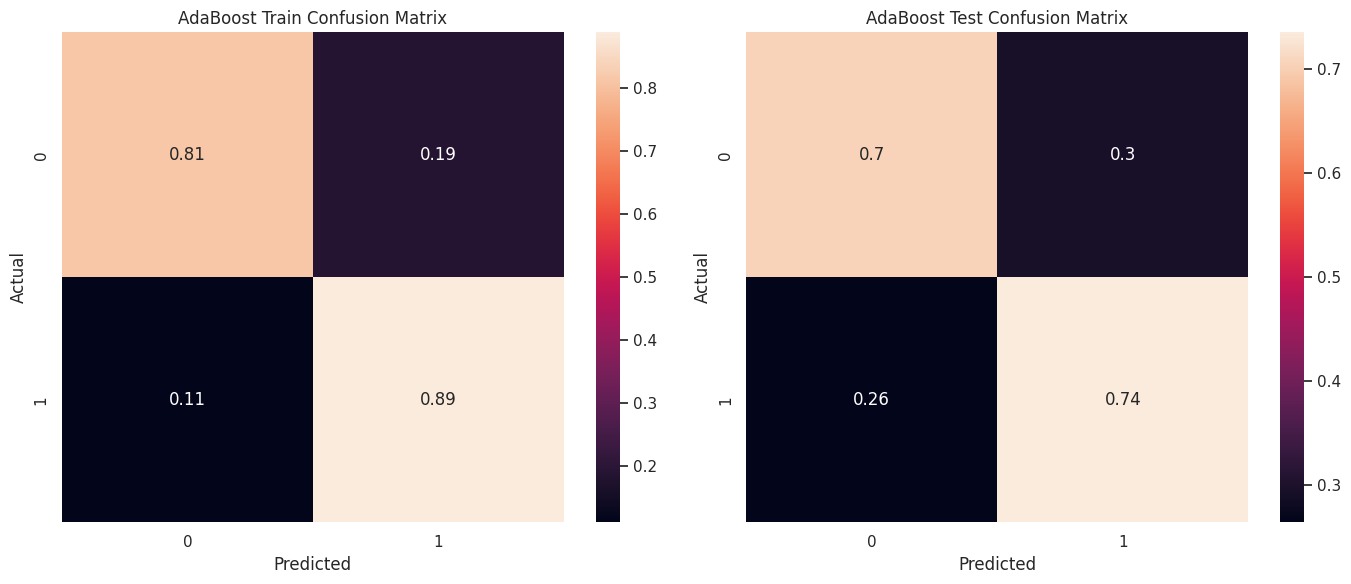

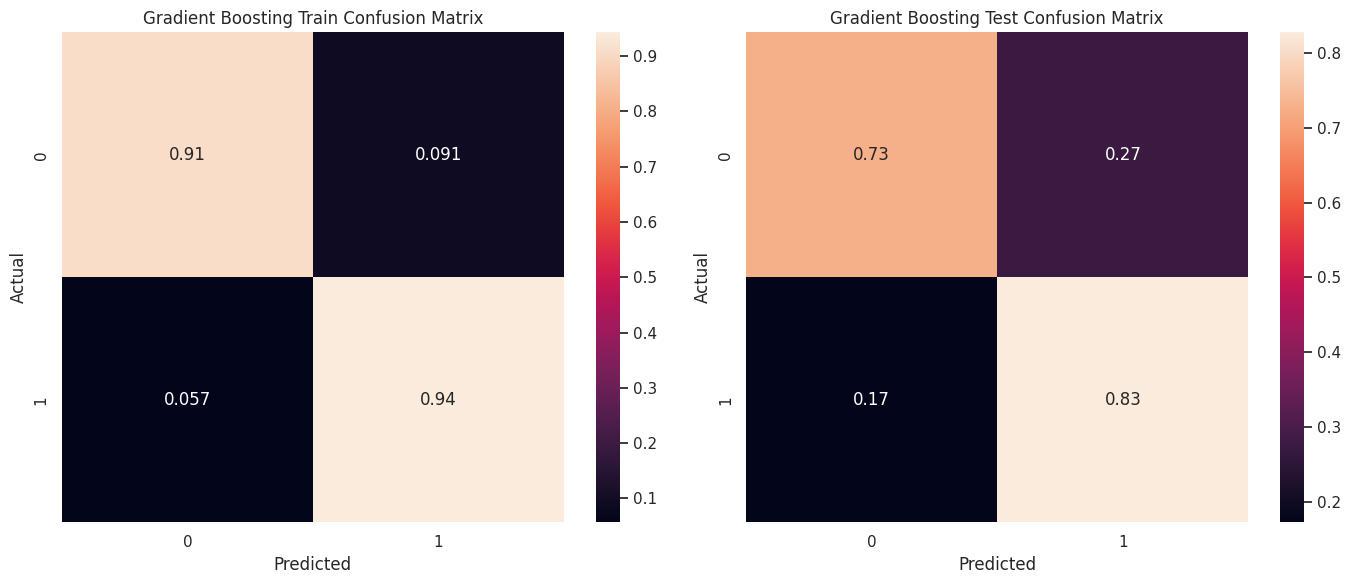

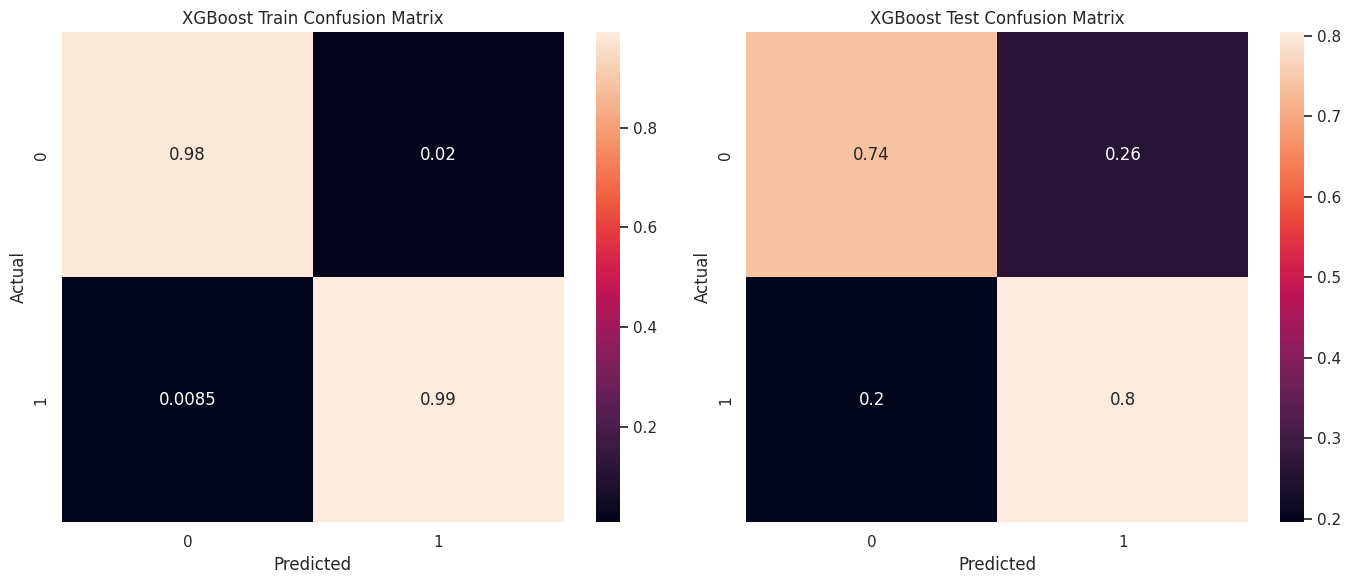

In [ ]:
print("After cleaning the data:")
for name, model in models.items():
    cv_train_accuracies = []
    cv_test_accuracies = []
    train_preds_all = []
    test_preds_all = []

    for train_index, test_index in skf.split(X_cleaned_resampled, y_cleaned_resampled):
        X_train_cleaned, X_test_cleaned = X_cleaned_resampled.iloc[train_index], X_cleaned_resampled.iloc[test_index]
        y_train_cleaned, y_test_cleaned = y_cleaned_resampled.iloc[train_index], y_cleaned_resampled.iloc[test_index]

        train_accuracy, test_accuracy, train_preds, test_preds = evaluate_model(model, X_train_cleaned, y_train_cleaned, X_test_cleaned, y_test_cleaned)
        cv_train_accuracies.append(train_accuracy)
        cv_test_accuracies.append(test_accuracy)
        train_preds_all.append(train_preds)
        test_preds_all.append(test_preds)

    train_accuracies_after.append(np.mean(cv_train_accuracies))
    test_accuracies_after.append(np.mean(cv_test_accuracies))

    # Plot confusion matrices for the last fold
    plot_confusion_matrices(y_train_cleaned, train_preds, y_test_cleaned, test_preds, name)


In [ ]:
# Function to build and train Artificial Neural Network
def build_ann(X_train, y_train, X_test, y_test, input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Evaluate the model
    _, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    _, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    print('Train Accuracy:', train_accuracy)
    print('Test Accuracy:', test_accuracy)

    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Test Accuracy over Epochs')
    plt.legend()
    plt.show()

    return train_accuracy, test_accuracy

# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    print(f"Evaluating {name}...")
    model.fit(X_train, y_train)
    _, train_accuracy = predict_and_plot(model, X_train, y_train, f'{name} Train')
    _, test_accuracy = predict_and_plot(model, X_test, y_test, f'{name} Validation')
    return train_accuracy, test_accuracy


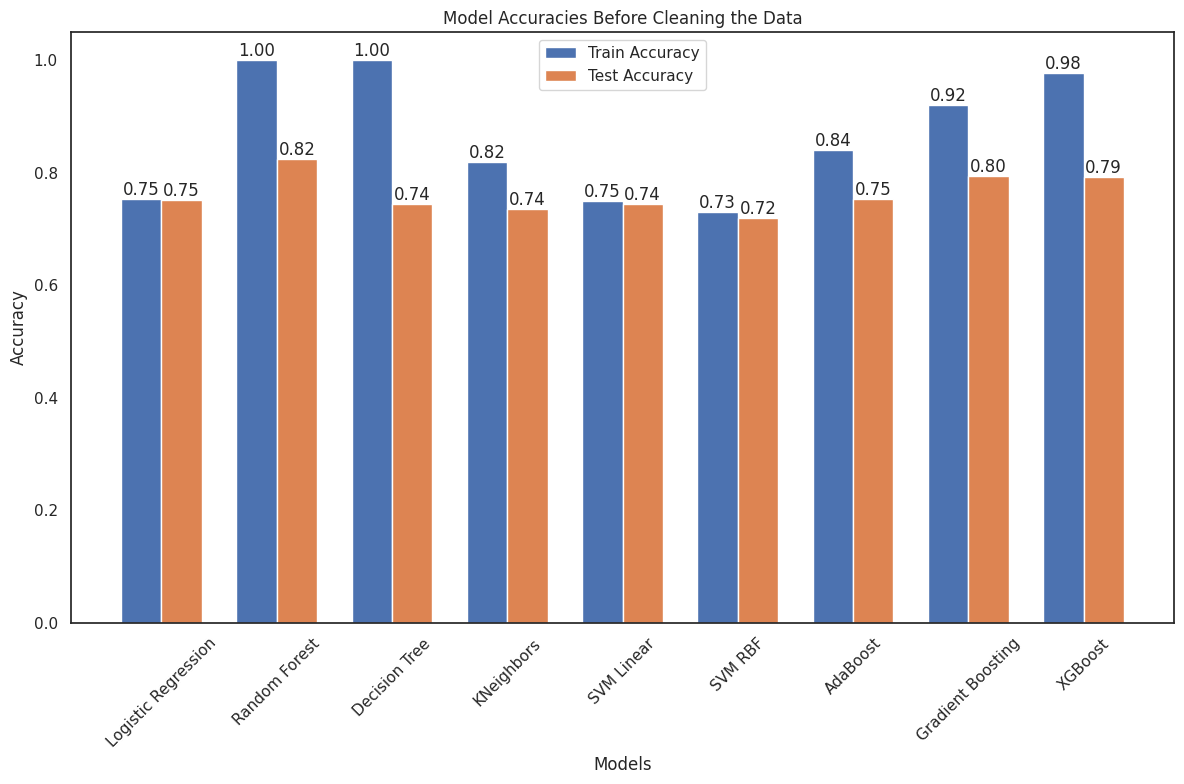

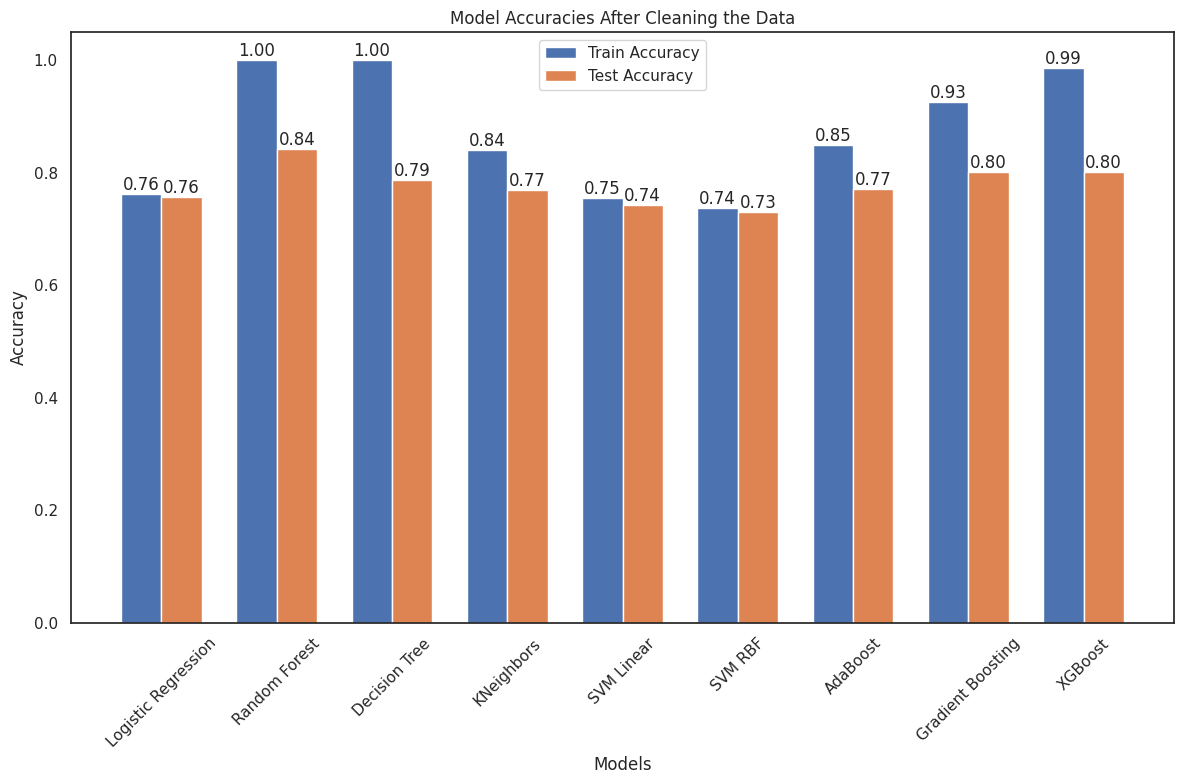

In [ ]:

# Plotting the results
def plot_accuracies(model_names, train_accuracies, test_accuracies, title):
    bar_width = 0.35
    index = np.arange(len(model_names))

    plt.figure(figsize=(12, 8))
    bar1 = plt.bar(index, train_accuracies, bar_width, label='Train Accuracy')
    bar2 = plt.bar(index + bar_width, test_accuracies, bar_width, label='Test Accuracy')

    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.xticks(index + bar_width / 2, model_names, rotation=45)
    plt.legend()

    for bar in bar1 + bar2:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Plot accuracies before cleaning the data
plot_accuracies(model_names, train_accuracies_before, test_accuracies_before, 'Model Accuracies Before Cleaning the Data')

# Plot accuracies after cleaning the data
plot_accuracies(model_names, train_accuracies_after, test_accuracies_after, 'Model Accuracies After Cleaning the Data')


In [39]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold


param_grid = {
    'n_estimators': [10, 20, 30],  # Adjust the number of trees in the forest
    'max_depth': [10, 20, 30],  # Adjust the maximum depth of each tree
    'min_samples_split': [2, 5, 10, 15, 20],  # Adjust the minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Adjust the minimum samples required in a leaf node
}

# Create the GridSearchCV object with RandomForestClassifier and StratifiedKFold
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

# Perform the grid search
grid_search.fit(X_cleaned_resampled, y_cleaned_resampled)

# Print the best parameters found
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Print the best cross-validation score
print("Best cross-validation score found by GridSearchCV: {:.2f}%".format(grid_search.best_score_ * 100))

# Get the best model
best_rf_model = grid_search.best_estimator_




Best parameters found by GridSearchCV:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
Best cross-validation score found by GridSearchCV: 83.84%


In [ ]:
# Save the best model to a file
import joblib
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
import os

# Giả sử bạn đã có hàm remove_outliers
def remove_outliers(df, feature, drop=True):
    # Implement the function to remove outliers here
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    if drop:
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

# Giả sử bạn đã có dữ liệu trong biến data
# df_clean = data.copy()

# Loại bỏ các giá trị ngoại lệ
for feature in data.columns:
    if feature != 'Outcome':
        df_clean = remove_outliers(df_clean, feature, drop=True)
        print("\n")

print(f'df shape: {data.shape}, new df shape: {df_clean.shape}, we lost {data.shape[0] - df_clean.shape[0]} rows, {(data.shape[0] - df_clean.shape[0]) / data.shape[0] * 100:.2f}% of our data')

X_cleaned = df_clean.drop('Outcome', axis=1)
y_cleaned = df_clean['Outcome']

# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE()
X_cleaned_resampled, y_cleaned_resampled = smote.fit_resample(X_cleaned, y_cleaned)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned_resampled)

# Chuyển đổi nhãn sang định dạng one-hot encoding
y_categorical = to_categorical(y_cleaned_resampled, num_classes=2)

# Xây dựng mô hình ANN
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_scaled.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))  # Sử dụng hàm softmax cho lớp đầu ra
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Định nghĩa số folds và khởi tạo KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

# Huấn luyện và đánh giá mô hình với k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    print(f"Fold {fold+1}/{n_splits}")
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]

    model = create_model()

    # Tạo hàm giảm tốc độ học của Adam optimizer
    def lr_schedule(epoch):
        initial_learning_rate = 0.001
        decay_steps = 50
        lr = initial_learning_rate * 0.95 ** (epoch // decay_steps)
        return lr

    lr_scheduler = LearningRateScheduler(lr_schedule)

    # Tạo thư mục để lưu trữ mô hình
    os.makedirs(f"model_fold_{fold+1}", exist_ok=True)

    # Định dạng tên file cho mô hình
    filepath = f"model_fold_{fold+1}/best_model.keras"

    # Lưu mô hình tốt nhất dựa trên validation accuracy
    checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler, checkpoint])

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))


Streaming output truncated to the last 5000 lines.
Epoch 259/500
17/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8299 - loss: 0.3622  
Epoch 259: val_accuracy did not improve from 0.84146
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8305 - loss: 0.3659 - val_accuracy: 0.8293 - val_loss: 0.4549 - learning_rate: 5.4036e-04
Epoch 260/500
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8553 - loss: 0.3179 
Epoch 260: val_accuracy did not improve from 0.84146
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8544 - loss: 0.3189 - val_accuracy: 0.8293 - val_loss: 0.4572 - learning_rate: 5.4036e-04
Epoch 261/500
15/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8483 - loss: 0.3546 
Epoch 261: val_accuracy did not improve from 0.84146
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8506 - loss: 0.3540 - val_accuracy: 0.8171 - val_loss: 0.4570 - learning_rate: 5.1334e-04
Epoch 262/500
13/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8646 - loss: 0.3238  
Epoch 2

In [ ]:
from tensorflow.keras.models import load_model

# Định nghĩa hàm tải mô hình từ file đã lưu
def load_fold_model(fold):
    model_path = f"model_fold_{fold}/best_model.keras"
    return load_model(model_path)

# Thực hiện dự đoán trên dữ liệu kiểm tra của mỗi fold
for fold, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    print(f"Fold {fold+1}/{n_splits}")
    X_test_fold = X_scaled[test_index]
    y_test_fold = y_categorical[test_index]

    # Tải mô hình từ file
    model = load_fold_model(fold+1)

    # Dự đoán trên dữ liệu kiểm tra và in báo cáo phân loại
    y_pred = model.predict(X_test_fold)
    y_pred_classes = np.argmax(y_pred, axis=1)

    print(classification_report(np.argmax(y_test_fold, axis=1), y_pred_classes))


In [ ]:
# Tạo một vectơ đặc trưng giả lập mô phỏng dữ liệu mới
new_sample = np.array([[10, 150, 70, 30, 80, 35, 0.5, 35]])

# Chuẩn hóa dữ liệu mới sử dụng cùng bộ scaler đã sử dụng cho dữ liệu huấn luyện
X_new_scaled = scaler.transform(new_sample)

# Dự đoán kết quả trên dữ liệu mới sử dụng mô hình đã được huấn luyện
predictions = []
for fold, _ in enumerate(kf.split(X_scaled)):
    # Tải mô hình từ file
    model = load_fold_model(fold+1)

    # Dự đoán trên dữ liệu mới
    y_pred = model.predict(X_new_scaled)
    print(y_pred)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(y_pred_classes)

    predictions.append(y_pred_classes)

# Tính trung bình dự đoán từ các fold
avg_predictions = np.mean(predictions, axis=0)

# In kết quả dự đoán
print("Predicted class:", avg_predictions[0])
